# Introduction
In this project, we use metadata from The Movie dataset to predict the overall worldwide box office revenue of over 7,000 previous films. Cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries are among the data points offered. We can collect other publically accessible data to incorporate in our model predictions, but only utilize data that would have been available before a movie's release in the spirit of this competition.

# Table of Contents
<br>
<ol>
    <li><a href='#Data-Overview-and-Extractions'>Data Overview and Extractions</a>
        <ul>
            <li><a href='#Imports-and-First-Look-at-the-Data'>Imports and First Look at the Data</a></li>    
            <li><a href='#Fixing-Features-which-Includes-Dict-Data'>Fixing Features which Includes Dict Data</a></li>
        </ul>
    </li>
    <li><a href='#Data-Exploration-and-Analysis'>Data Exploration and Analysis</a>
        <ul>
            <li><a href='#Extraction-for-"belongs_to_collection"'>Extraction for "belongs_to_collection"</a></li>
            <li><a href='#Extraction-for-"Genres"'>Extraction for "Genres"</a></li>
            <li><a href='#Extraction-for-"production_companies"'>Extraction for "production_companies"</a></li>
            <li><a href='#Extraction-for-"production_countries"'>Extraction for "production_countries"</a></li>
            <li><a href='#Extraction-for-"spoken_languages"'>Extraction for "spoken_languages"</a></li>
            <li><a href='#Extraction-for-"Keywords"'>Extraction for "Keywords"</a></li>
            <li><a href='#Extraction-for-"cast"'>Extraction for "cast"</a></li>
            <li><a href='#Extraction-for-"crew"'>Extraction for "crew"</a></li>
        </ul>
    </li>
    <li><a href='#Creating-Models-and-Making-Predictions'>Creating Models and Making Predictions</a>
        <ul>
            <li><a href='#Text-Based-OOF-Features'>Text Based OOF Features</a></li>
            <li><a href='#Generating-More-Features'>Generating More Features</a></li>
            <li><a href='#Critical-Features'>Critical Features</a></li>
            <li><a href='#External-Features'>External Features</a></li>
            <li><a href='#Model-Blending'>Model Blending</a></li>
            <li><a href='#Stacking'>Stacking</a></li>
        </ul>
    </li>
    <li><a href='#Comparing-Prediction-Models'>Comparing Prediction Models</a></li>
    <li><a href='#Getting-CSV-Files-of-Prediction-Models'>Getting CSV Files of Prediction Models</a></li>
    <li><a href='#Conclusion'>Conclusion</a></li>
</ol>

# Data Overview and Extractions
<a href='#Introduction'>Back to Top</a>

## Imports and First Look at the Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from wordcloud import WordCloud as wc

import datetime
import time


from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams


stop = set(stopwords.words('english'))

import os

import xgboost as xgb
import lightgbm as lgb

import json
import ast
import eli5 as eli
import shap
from catboost import CatBoostRegressor
from urllib.request import urlopen
from PIL import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\burak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
train_df = pd.read_csv("train.csv")
cinema_ticket_ref = pd.read_csv("cinemaTicket_Ref.csv")
sample_submission = pd.read_csv("sample_submission.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                NaN   
4                                                NaN   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
train_df.describe().columns.to_list()

['id', 'budget', 'popularity', 'runtime', 'revenue']

First of all, we will work with features outside of this feature list because this list includes fatures which contains numerical values.

## Fixing Features which Includes Dict Data
<a href='#Introduction'>Back to Top</a>

In [6]:
# There are a couple of column that includes dict type variables
# make a list of these
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

In [7]:
def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

In [8]:
new_train = text_to_dict(train_df)
new_test = text_to_dict(test_df)

In [9]:
new_train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                 {}   3300000   
3   4                                                 {}   1200000   
4   5                                                 {}         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                 {}   
4                                                 {}   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

In [10]:
# We can observe type of a feature in dict_columns. For example: 'genres'
for i in train_df.genres:
    print(type(i))
    break

<class 'list'>


It seems we did the tranformation correct.

In [11]:
print("Train shape: {}\n".format(new_train.shape))
print("Test shape: {}\n".format(new_test.shape))

Train shape: (3000, 23)

Test shape: (4398, 22)



Some of fetures in the data contains one or more dictionaries so we have to extract all of them individually.

## Extraction for "belongs_to_collection"
<a href='#Introduction'>Back to Top</a>

In [12]:
for ind, dic in enumerate(new_train.belongs_to_collection[:5]):
    print(ind, dic)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


In [13]:
new_train['belongs_to_collection'].apply(lambda x: len(x) if len(x) != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

For belongs_to_collections 2396 sample is None-, and 604 contrain information about the collections. Collaection names might be the the most important feature in all of these.

In [14]:
# Add collection names and length of its collections to train and test dataframes
new_train['collection_names'] = new_train.belongs_to_collection.apply(lambda x: x[0]['name'] if x != {} else 0)
new_train['has_collection'] = new_train.belongs_to_collection.apply(lambda x: len(x) if x != {} else 0)

new_test['collection_names'] = new_test.belongs_to_collection.apply(lambda x: x[0]['name'] if x != {} else 0)
new_test['has_collection'] = new_test.belongs_to_collection.apply(lambda x: len(x) if x != {} else 0)

# Drop belongs_to_collection column from train and test dataframes
new_train = new_train.drop(['belongs_to_collection'], axis=1)
new_test = new_test.drop(['belongs_to_collection'], axis=1)

Let's have a look for it was worked

In [15]:
new_train.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'collection_names', 'has_collection'],
      dtype='object')

In [16]:
new_test.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'collection_names', 'has_collection'],
      dtype='object')

## Extraction for "Genres"
<a href='#Introduction'>Back to Top</a>

In [17]:
for ind, dic in enumerate(new_train['genres'].head()):
    print(ind, dic)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Controlling to find how many genres in this dataframe

In [18]:
print("Number of genres for films: \n")
new_train.genres.apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres for films: 



2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

Genres feature has two useful parameters: ids and names of genres. 2 or 3 is the most commmon genres for this feature. So, let's extract this future and create a new column that separated by each genre types as dummy values for genres. Also, 0 and 7 are our outliers i guess.

In [19]:
# At firt, we should know the genres that will used
list_of_genres = [*new_train.genres.apply(lambda x: [i['name'] for i in x] if x != {} else []).values];list_of_genres

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

We can visualize these genres for better understanding

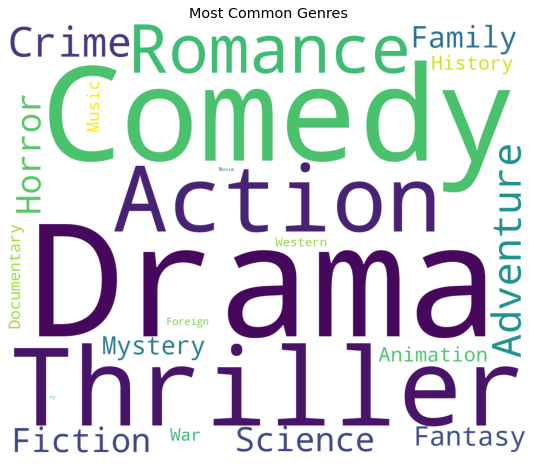

In [20]:
plt.figure(figsize=(10,8))
text = ' '.join([i for j in list_of_genres for i in j])
wrdCloud = wc(max_font_size=None, background_color='white', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wrdCloud)
plt.title('Most Common Genres')
plt.axis('off')
plt.show()

Also we can visualize it with histogram

In [21]:
most_genres = [x for y in list_of_genres for x in y];most_genres

['Comedy',
 'Comedy',
 'Drama',
 'Family',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Action',
 'Thriller',
 'Animation',
 'Adventure',
 'Family',
 'Horror',
 'Thriller',
 'Documentary',
 'Action',
 'Comedy',
 'Music',
 'Family',
 'Adventure',
 'Comedy',
 'Music',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',
 'Romance',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Family',
 'Science Fiction',
 'Horror',
 'Thriller',
 'Thriller',
 'Horror',
 'Thriller',
 'Mystery',
 'Foreign',
 'Horror',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Comedy',
 'Romance',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Comedy',
 'Mystery',
 'Drama',
 'Thriller',
 'Fantasy',
 'Action',
 'Adventure',
 'Horror',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 

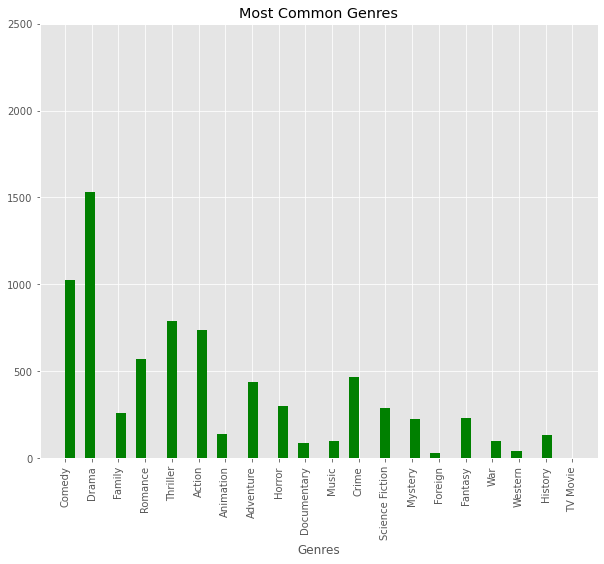

In [22]:
plt.figure(figsize=(10,8))
plt.hist(most_genres, color='green', bins=50)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,3000,500))
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.show()

The winners are (Best of 3):
1. Drama
2. Comedy
3. Thriller

In [23]:
Counter([x for j in list_of_genres for x in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

Let's try to create separate columns for top 15 genres

In [24]:
new_train['genres_numbers'] = new_train['genres'].apply(lambda x: len(x) if x != {} else 0)
new_train['all_genres'] = new_train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_genres = [g[0] for g in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for genre in top_genres:
    new_train['genre_' + genre] = new_train['all_genres'].apply(lambda x: 1 if genre in x else 0)

new_test['genres_numbers'] = new_test['genres'].apply(lambda x: len(x) if x != {} else 0)
new_test['all_genres'] = new_test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

for genre in top_genres:
    new_test['genre_' + genre] = new_test['all_genres'].apply(lambda x: 1 if genre in x else 0)
    
# After these configurations, we can drop the columns from train and test
new_train = new_train.drop(['genres'], axis=1)
new_test = new_test.drop(['genres'], axis=1)

Checking results out!

In [25]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'collection_names', 'has_collection',
       'genres_numbers', 'all_genres', 'genre_Drama', 'genre_Comedy',
       'genre_Thriller', 'genre_Action', 'genre_Romance', 'genre_Crime',
       'genre_Adventure', 'genre_Horror', 'genre_Science Fiction',
       'genre_Family', 'genre_Fantasy', 'genre_Mystery', 'genre_Animation',
       'genre_History', 'genre_Music'],
      dtype='object')

In [26]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'collection_names', 'has_collection', 'genres_numbers',
       'all_genres', 'genre_Drama', 'genre_Comedy', 'genre_Thriller',
       'genre_Action', 'genre_Romance', 'genre_Crime', 'genre_Adventure',
       'genre_Horror', 'genre_Science Fiction', 'genre_Family',
       'genre_Fantasy', 'genre_Mystery', 'genre_Animation', 'genre_History',
       'genre_Music'],
      dtype='object')

That's all for now for genres feature. Lets keep going to production_companies

## Extraction for "production_companies"
<a href='#Introduction'>Back to Top</a>

In [27]:
# First looking to this feature
for ind, dic in enumerate(new_train.production_companies.head()):
    print(ind, dic)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


It seems all company has an id and of course a name. Both of them seem necessary for us right now. In my opinion, it will be easier than other ones.

In [28]:
print("Number of production companies for films: \n")
new_train.production_companies.apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies for films: 



1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: production_companies, dtype: int64

Most of films have 1 or 2 companies for production. Besides, 3 and 4 are also seem good. On the other hand, there are 10+ companies exist. We must look at them quickly!

In [29]:
new_train[new_train.production_companies.apply(lambda x: len(x) if x != {} else 0) > 11]

id    budget                                           homepage  \
31      32         0                        http://www.cache-derfilm.at   
116    117         0                                                NaN   
363    364  15400000                                                NaN   
392    393         0                                                NaN   
449    450  80000000             http://asoundofthunder.warnerbros.com/   
554    555  14500000                                                NaN   
1079  1080   7000000                                                NaN   
2170  2171   4000000  http://tickets.picturehouseentertainment.co.uk...   
2395  2396         0                                                NaN   
2517  2518  97250400  http://www.asterixauxjeuxolympiques.com/index.php   

        imdb_id original_language               original_title  \
31    tt0387898                fr                        Caché   
116   tt2113822                zh                         一九四二   
363   tt2053425                fr           De rouille et d'os   
392   tt5072406                fr                         Moka   
449   tt0318081                en           A Sound of Thunder   
554   tt0293416                ja                   Metropolis   
1079  tt2737050                fr         Deux jours, une nuit   
2170  tt3464902                en                  The Lobster   
2395  tt4082068                fr                      Dheepan   
2517  tt0463872                fr  Astérix aux Jeux Olympiques   

                                               overview  popularity  \
31    A married couple is terrorized by a series of ...    5.695860   
116   In 1942, Henan Province was devastated by the ...    1.678013   
363   Put in charge of his young son, Ali leaves Bel...    8.400049   
392   Diane Kramer is led by one obsession: to find ...    2.404466   
449   When a hunter sent back to the prehistoric era...    4.980191   
554   Duke Red has overseen the construction of a ma...    9.298092   
1079  Sandra is a young woman who has only one weeke...    6.868022   
2170  In a dystopian near future, single people, acc...   11.223033   
2395  Dheepan is a Sri Lankan Tamil warrior who flee...    5.752416   
2517  Ast√©rix and Ob√©lix have to win the Olympic G...    9.671944   

                           poster_path  \
31    /i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg   
116    /xxz2gi8vijqqJySGO3kQy2i8mv.jpg   
363   /cHCwW8xPl8yPKQwpNzKVinwvirT.jpg   
392   /5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg   
449   /gsqOX1ReJ5lcmTuDdkhOXLug8Ug.jpg   
554   /1EK7mGCpRKYmSg25FaojvnS9opm.jpg   
1079  /1mYAejpMskvskGr0J0SaBvdjmrH.jpg   
2170  /yR60EqMGS9hHq9I5Pkq2hG984TP.jpg   
2395  /lgONuekbRlM0eMvMHJBEDL6MsBP.jpg   
2517  /tKL0RJOeuccc1rrpcDKg8qhedIz.jpg   

                                   production_companies  \
31    [{'name': 'Les Films du Losange', 'id': 223}, ...   
116   [{'name': 'Emperor Motion Pictures', 'id': 272...   
363   [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
392   [{'name': 'Canal+', 'id': 5358}, {'name': 'Cin...   
449   [{'name': 'Epsilon Motion Pictures', 'id': 117...   
554   [{'name': 'Bandai Visual Company', 'id': 528},...   
1079  [{'name': 'BIM Distribuzione', 'id': 225}, {'n...   
2170  [{'name': 'Haut et Court', 'id': 726}, {'name'...   
2395  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
2517  [{'name': 'Constantin Film', 'id': 47}, {'name...   

                                   production_countries release_date  runtime  \
31    [{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...       5/2/05    117.0   
116             [{'iso_3166_1': 'CN', 'name': 'China'}]      11/1/12    145.0   
363   [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...      5/17/12    123.0   
392   [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...      8/17/16     89.0   
449   [{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...      5/15/05    110.0   
554             [{'iso_3166_1': 'JP', 'name': 'Japan'}]      5/26/01    10

In [30]:
companies_list = [*new_train.production_companies.apply(lambda x: [i['name'] for i in x] if x != {} else []).values]
companies_list

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

In [31]:
Counter([i for j in companies_list for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

It's not obvious what to do right now, so we better to keep going after adding new dummy columns as before...

In [32]:
new_train['companies_numbers'] = new_train.production_companies.apply(lambda x: len(x) if x != {} else 0)
new_train['all_companies'] = new_train.production_companies.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [c[0] for c in Counter([i for j in companies_list for i in j]).most_common(30)]
for company in top_companies:
    new_train['production_company_' + company] = new_train['all_companies'].apply(lambda x: 1 if company in x else 0)

# Repeat it for test dataframe
new_test['companies_numbers'] = new_test.production_companies.apply(lambda x: len(x) if x!= {} else 0)
new_test['all_companies'] = new_test.production_companies.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for company in top_companies:
    new_test['production_company_' + company] = new_test['all_companies'].apply(lambda x: 1 if company in x else 0)
    
# Drop the relative columns from test and train
new_train = new_train.drop(['production_companies'], axis=1)
new_test = new_test.drop(['production_companies'], axis=1)

In [33]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'collection_names', 'has_collection', 'genres_numbers', 'all_genres',
       'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action',
       'genre_Romance', 'genre_Crime', 'genre_Adventure', 'genre_Horror',
       'genre_Science Fiction', 'genre_Family', 'genre_Fantasy',
       'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music',
       'companies_numbers', 'all_companies', 'production_company_Warner Bros.',
       'production_company_Universal Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox Film Corporation',
       'production_company_Columbia Pictures',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
    

In [34]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew',
       'collection_names', 'has_collection', 'genres_numbers', 'all_genres',
       'genre_Drama', 'genre_Comedy', 'genre_Thriller', 'genre_Action',
       'genre_Romance', 'genre_Crime', 'genre_Adventure', 'genre_Horror',
       'genre_Science Fiction', 'genre_Family', 'genre_Fantasy',
       'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music',
       'companies_numbers', 'all_companies', 'production_company_Warner Bros.',
       'production_company_Universal Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox Film Corporation',
       'production_company_Columbia Pictures',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'product

We created a new features on train and test dataframes. Next column please!

## Extraction for "production_countries"
<a href='#Introduction'>Back to Top</a>

In [35]:
for ind, dic in enumerate(new_train.production_countries.head()):
    print(ind, dic)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


By the way, iso codes are the standard that defines the codes for the names of countries, dependent territories and special geographical areas. You know what name is right :)

In [36]:
print("Number of production countries: \n")
new_train.production_countries.apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries: 



1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

Films are generally produced in 1 country, but there are producers that work together with different country's producer.<br>
And now, we are creating a country list for all films

In [37]:
list_of_countries = [*new_train.production_countries.apply(lambda x: [i['name'] for i in x] if x != {} else []).values]
list_of_countries

[['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['India'],
 ['South Korea'],
 [],
 ['United States of America', 'Canada'],
 [],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['Serbia'],
 ['United States of America'],
 ['United Kingdom'],
 ['Austria', 'Germany', 'United Kingdom'],
 ['France'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['New Zealand'],
 ['Japan', 'United States of America'],
 ['United States of America'],
 ['Canada', 'Ireland'],
 ['United States of America'],
 ['United States of America'],
 ['France'],
 ['Austria', 'France', 'Germany', 'Italy', 'United States of America'],
 ['United States of America'],
 ['United States of America', 'New Zealand', 'Canada', 'Israel', 'Japan']

We can do the same thing for this column

In [38]:
new_train['country_numbers'] = new_train.production_countries.apply(lambda x: len(x) if x != {} else 0)
new_train['all_countries'] = new_train.production_countries.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if
                                                                 x != {} else '')
top_countries = [c[0] for c in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for country in top_countries:
    new_train['production_country_' + country] = new_train['all_countries'].apply(lambda x: 1 if country in x else 0)

new_test['country_numbers'] = new_test.production_countries.apply(lambda x: len(x) if x != {} else 0)
new_test['all_countries'] = new_test.production_countries.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if
                                                               x != {} else '')
for country in top_countries:
    new_test['production_country_' + country] = new_test['all_countries'].apply(lambda x: 1 if country in x else 0)
    
# Drop the columns
new_train = new_train.drop(['production_countries'], axis=1)
new_test = new_test.drop(['production_countries'], axis=1)

Let's check these cahnges

In [39]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'collection_names',
       'has_collection', 'genres_numbers', 'all_genres', 'genre_Drama',
       'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance',
       'genre_Crime', 'genre_Adventure', 'genre_Horror',
       'genre_Science Fiction', 'genre_Family', 'genre_Fantasy',
       'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music',
       'companies_numbers', 'all_companies', 'production_company_Warner Bros.',
       'production_company_Universal Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox Film Corporation',
       'production_company_Columbia Pictures',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_N

In [40]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'collection_names',
       'has_collection', 'genres_numbers', 'all_genres', 'genre_Drama',
       'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance',
       'genre_Crime', 'genre_Adventure', 'genre_Horror',
       'genre_Science Fiction', 'genre_Family', 'genre_Fantasy',
       'genre_Mystery', 'genre_Animation', 'genre_History', 'genre_Music',
       'companies_numbers', 'all_companies', 'production_company_Warner Bros.',
       'production_company_Universal Pictures',
       'production_company_Paramount Pictures',
       'production_company_Twentieth Century Fox Film Corporation',
       'production_company_Columbia Pictures',
       'production_company_Metro-Goldwyn-Mayer (MGM)',
       'production_company_New Line Cin

## Extraction for "spoken_languages"
<a href='#Introduction'>Back to Top</a>

In [41]:
for ind, dic in enumerate(new_train.spoken_languages.head()):
    print(ind, dic)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [42]:
print("Number of spoken languages: \n")
new_train.spoken_languages.apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages: 



1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

It looks like most of films contains one language. On the other hand, some of films used more than 1 languages

In [43]:
# Making a list for languages
list_of_languages = [*new_train.spoken_languages.apply(lambda x: [i['name'] for i in x] if x!={} else []).values]
list_of_languages

[['English'],
 ['English'],
 ['English'],
 ['English', 'हिन्दी'],
 ['한국어/조선말'],
 ['English'],
 ['English'],
 ['العربية', 'English'],
 ['English'],
 ['English'],
 ['English'],
 ['English'],
 ['English'],
 ['English', 'Pусский'],
 ['English', 'svenska'],
 ['Srpski'],
 ['English', 'Pусский'],
 ['English'],
 ['Deutsch', 'English'],
 ['English', 'Français', 'Italiano'],
 ['English'],
 ['English'],
 ['English'],
 ['English'],
 ['English', 'Français', 'Italiano'],
 ['English'],
 ['English'],
 ['English'],
 ['English', '日本語'],
 ['English'],
 ['English', 'Français'],
 ['Français'],
 ['English'],
 ['العربية', 'English', 'Français', 'Deutsch', 'עִבְרִית', '日本語', 'Português'],
 ['Latin', 'English', 'Français', '日本語', '普通话'],
 ['English', '普通话', 'Pусский'],
 ['English'],
 ['English', '한국어/조선말', 'Français'],
 ['English', '日本語', 'Español'],
 ['English', 'Français', 'Español'],
 ['English'],
 ['English'],
 ['Français', 'English'],
 ['English'],
 ['English'],
 ['Italiano', 'Español'],
 ['English'],
 ['

In [44]:
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [45]:
new_train['language_numbers'] = new_train.spoken_languages.apply(lambda x: len(x) if x!={} else 0)
new_train['all_languages'] = new_train.spoken_languages.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if
                                                             x!={} else '')
top_languages = [l[0] for l in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for language in top_languages:
    new_train['language_' + language] = new_train['all_languages'].apply(lambda x: 1 if language in x else 0)

new_test['language_numbers'] = new_test.spoken_languages.apply(lambda x: len(x) if x!={} else 0)
new_test['all_languages'] = new_test.spoken_languages.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) 
                                                            if x!={} else '')
for lang in top_languages:
    new_test['language_' + lang] = new_test['all_languages'].apply(lambda x: 1 if lang in x else 0)

# Drop the columns
new_train = new_train.drop(['spoken_languages'], axis=1)
new_test = new_test.drop(['spoken_languages'], axis=1)

In [46]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'language_Český', 'language_עִבְרִית', 'language_ελληνικά',
       'language_Türkçe', 'language_Dansk', 'language_Nederlands',
       'language_فارسی', 'language_Tiếng Việt', 'language_اردو',
       'language_Română'],
      dtype='object', length=128)

In [47]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'language_Český', 'language_עִבְרִית', 'language_ελληνικά',
       'language_Türkçe', 'language_Dansk', 'language_Nederlands',
       'language_فارسی', 'language_Tiếng Việt', 'language_اردو',
       'language_Română'],
      dtype='object', length=127)

## Extraction for "Keywords" 
<a href='#Introduction'>Back to Top</a>

In [48]:
for ind, dic in enumerate(new_train.Keywords.head()):
    print(ind, dic)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [49]:
print("Number of Keywords for films: \n")
new_train.Keywords.apply(lambda x: len(x) if x!={} else 0).value_counts()

Number of Keywords for films: 



5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
15      59
14      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
31       2
29       2
30       2
32       2
28       2
37       2
33       1
39       1
40       1
38       1
149      1
43       1
97       1
Name: Keywords, dtype: int64

Let's have a look at most common keywords

In [50]:
list_of_keywords = [*new_train.Keywords.apply(lambda x: [i['name'] for i in x] if x!={} else []).values]
list_of_keywords

[['time travel', 'sequel', 'hot tub', 'duringcreditsstinger'],
 ['coronation', 'duty', 'marriage', 'falling in love'],
 ['jazz',
  'obsession',
  'conservatory',
  'music teacher',
  'new york city',
  'violence',
  'montage',
  'drummer',
  'public humiliation',
  'jazz band',
  'young adult',
  'music school'],
 ['mystery',
  'bollywood',
  'police corruption',
  'crime',
  'india',
  'missing husband',
  'nerve gas'],
 [],
 [],
 [],
 ['journalism',
  'translation',
  'television',
  'manipulation of the media',
  'iraq',
  'reporter',
  'woman director'],
 ['island', 'pirate gang', 'puppet', 'treasure hunt'],
 ['mockumentary', 'folk singer'],
 ['underdog',
  'philadelphia',
  'transporter',
  'italo-american',
  'fight',
  "love of one's life",
  'publicity',
  'boxer',
  'independence',
  'boxing match',
  'training',
  'lovers',
  'surprise',
  'world champion',
  'amateur',
  'victory'],
 ['nerd', 'vacation', 'farce', 'jock', 'frame up', 'defector'],
 ['male nudity',
  'female nu

Let's visualize it for better looking

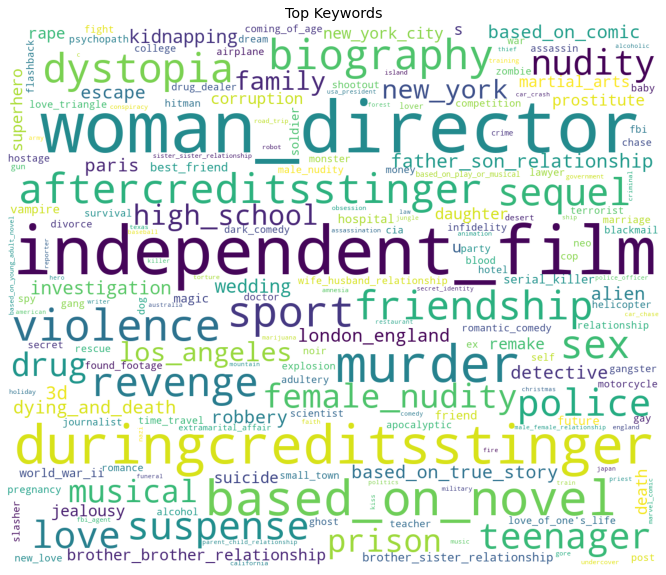

In [51]:
plt.figure(figsize=(15,10))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wrdCloud = wc(max_font_size=None, background_color='white', collocations=False, width=1200, height=1000).generate(text)
plt.imshow(wrdCloud)
plt.axis('off')
plt.title("Top Keywords")
plt.show()

In [52]:
new_train['keyword_numbers'] = new_train.Keywords.apply(lambda x: len(x) if x!={} else 0)
new_train['all_keywords'] = new_train.Keywords.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')
top_keywords = [k[0] for k in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for key in top_keywords:
    new_train['keyword_' + key] = new_train['all_keywords'].apply(lambda x: 1 if key in x else 0)
    
new_test['keyword_numbers'] = new_test.Keywords.apply(lambda x: len(x) if x!={} else 0)
new_test['all_keywords'] = new_test.Keywords.apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')
for key in top_keywords:
    new_test['keyword_' + key] = new_test['all_keywords'].apply(lambda x: 1 if key in x else 0)
    
# Drop the columns
new_train = new_train.drop(['Keywords'], axis=1)
new_test = new_test.drop(['Keywords'], axis=1)

In [53]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'keyword_drug', 'keyword_prison', 'keyword_musical',
       'keyword_high school', 'keyword_los angeles', 'keyword_new york',
       'keyword_family', 'keyword_father son relationship',
       'keyword_kidnapping', 'keyword_investigation'],
      dtype='object', length=159)

In [54]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'keyword_drug', 'keyword_prison', 'keyword_musical',
       'keyword_high school', 'keyword_los angeles', 'keyword_new york',
       'keyword_family', 'keyword_father son relationship',
       'keyword_kidnapping', 'keyword_investigation'],
      dtype='object', length=158)

## Extraction for "cast"
<a href='#Introduction'>Back to Top</a>

In [55]:
for ind, dic in enumerate(new_train.cast.head(1)):
    print(ind, dic)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [56]:
print("Number of casted people in films: \n")
new_train.cast.apply(lambda x: len(x) if x!={} else 0).value_counts().head(15)

Number of casted people in films: 



15    212
16    165
10    135
13    129
12    124
11    122
17    118
9     118
18    115
14    110
8     106
19    102
7      96
20     93
22     77
Name: cast, dtype: int64

Having a look at famous actor/actress names

In [57]:
list_of_cast_names = [*new_train.cast.apply(lambda x: [i['name'] for i in x] if x!={} else []).values]
list_of_cast_names

[['Rob Corddry',
  'Craig Robinson',
  'Clark Duke',
  'Adam Scott',
  'Chevy Chase',
  'Gillian Jacobs',
  'Bianca Haase',
  'Collette Wolfe',
  'Kumail Nanjiani',
  'Kellee Stewart',
  'Josh Heald',
  'Gretchen Koerner',
  'Lisa Loeb',
  'Jessica Williams',
  'Bruce Buffer',
  'Mariana Paola Vicente',
  'Christian Slater',
  'Jason Jones',
  'Olivia Jordan',
  'Christine Bently',
  'Stacey Asaro',
  'John Cusack',
  'Adam Herschman',
  'Kisha Sierra'],
 ['Anne Hathaway',
  'Julie Andrews',
  'H√©ctor Elizondo',
  'John Rhys-Davies',
  'Heather Matarazzo',
  'Chris Pine',
  'Callum Blue',
  'Larry Miller',
  'Raven-Symon√©',
  'Kathleen Marshall',
  'Caroline Goodall',
  'Lorraine Nicholson',
  'Shannon Wilcox',
  'Greg Lewis',
  'Abigail Breslin',
  'Paul Vogt',
  'Joseph Leo Bwarie',
  'Hope Alexander-Willis',
  'Rowan Joseph',
  'Jeffrey Scott Jensen'],
 ['Miles Teller',
  'J.K. Simmons',
  'Melissa Benoist',
  'Austin Stowell',
  'Jayson Blair',
  'Kavita Patil',
  'Paul Reiser',


In [58]:
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [59]:
# list_of_cast_names_url = [*new_train.cast.apply(lambda x: [(i['name'], i['profile_path']) for i in x] if x!={} else []).values]
# most = Counter([i for j in list_of_cast_names_url for i in j]).most_common(16)
# 
# # Visualizing
# fig = plt.figure(figsize=(20,12))
# for ind, pic in enumerate([x[0] for x in most]):
#     ax = fig.add_subplot(4, 4, ind+1, xticks=[], yticks=[])
#     img = Image.open(urlopen(f"https://image.tmdb.org/t/p/w600_and_h900_bestv2{pic[1]}"))
#     plt.imshow(img)
#     ax.set_title(f'{pic[0]}')

Create a gender list for cast

In [60]:
list_of_cast_genders = [*new_train.cast.apply(lambda x: [i['gender'] for i in x] if x!={} else []).values]
list_of_cast_genders

[[2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1],
 [1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2],
 [2,
  2,
  1,
  2,
  2,
  1,
  2,
  0,
  2,
  2,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  2,
  0,
  1,
  0,
  0,
  0,
  2,
  1,
  0],
 [1, 2, 0, 0, 0, 2, 0],
 [2, 2, 2, 2],
 [2, 2, 0, 0],
 [2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2],
 [0, 0, 2, 0],
 [2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0],
 [2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0],
 [2,
  1,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  2,
  1,
  2,
  2,
  0,
  2,
  2,
  0,
  1,
  1,
  0,
  2,
  0],
 [2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2],
 [2,
  1,
  1,
  2,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  1,
  0,
  2,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,

In [61]:
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

0 --> non specified<br>
1 --> female<br>
2 --> male<br>
"This information came from kaggle comments."

In [62]:
list_of_cast_chars = [*new_train.cast.apply(lambda x: [i['character'] for i in x] if x!={} else []).values]
Counter([i for j in list_of_cast_chars for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

In [63]:
new_train['cast_numbers'] = new_train.cast.apply(lambda x: len(x) if x!={} else 0)
top_cast_names = [n[0] for n in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for name in top_cast_names:
    new_train['cast_name_' + name] = new_train.cast.apply(lambda x: 1 if name in str(x) else 0)
new_train['gender_0_cast'] = new_train.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
new_train['gender_1_cast'] = new_train.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
new_train['gender_2_cast'] = new_train.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_chars = [c[0] for c in Counter([i for j in list_of_cast_chars for i in j]).most_common(15)]
for char in top_cast_chars:
    new_train['cast_char_' + char] = new_train.cast.apply(lambda x: 1 if char in str(x) else 0)
    
# Do the same operations for test df
new_test['cast_numbers'] = new_test.cast.apply(lambda x: len(x) if x!={} else 0)
for name in top_cast_names:
    new_test['cast_name_' + name] = new_test.cast.apply(lambda x: 1 if name in str(x) else 0)
new_test['gender_0_cast'] = new_test.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
new_test['gender_1_cast'] = new_test.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
new_test['gender_2_cast'] = new_test.cast.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for char in top_cast_chars:
    new_test['cast_char_' + char] = new_test.cast.apply(lambda x: 1 if char in str(x) else 0)
    
# Drop the columns from train and test dfs
new_train = new_train.drop(['cast'], axis=1)
new_test = new_test.drop(['cast'], axis=1)

In [64]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'cast_char_Doctor', 'cast_char_Reporter', 'cast_char_Waitress',
       'cast_char_Nurse', 'cast_char_Bartender', 'cast_char_Jack',
       'cast_char_Debutante', 'cast_char_Security Guard', 'cast_char_Paul',
       'cast_char_Frank'],
      dtype='object', length=192)

In [65]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'cast_char_Doctor', 'cast_char_Reporter', 'cast_char_Waitress',
       'cast_char_Nurse', 'cast_char_Bartender', 'cast_char_Jack',
       'cast_char_Debutante', 'cast_char_Security Guard', 'cast_char_Paul',
       'cast_char_Frank'],
      dtype='object', length=191)

## Extraction for "crew" 
<a href='#Introduction'>Back to Top</a>

First look at crew feature

In [66]:
for ind, dic in enumerate(new_train.crew.head(1)):
    print(ind, dic)

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [67]:
print("Number of crew members in films: \n")
new_train.crew.apply(lambda x: len(x) if x!={} else 0).value_counts().head(15)

Number of crew members in films: 



2     179
11    127
10    126
3     126
12    110
8     109
9     109
14    104
4     101
7      94
16     89
6      85
15     85
13     84
17     82
Name: crew, dtype: int64

Looking most popular names for films' crews

In [68]:
list_of_crew_names = [*new_train.crew.apply(lambda x: [i['name'] for i in x] if x!={} else []).values]
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

Creating a list of jobs for crew members

In [69]:
list_of_crew_jobs = [*new_train.crew.apply(lambda x: [i['job'] for i in x] if x!={} else [])]

# Finding most common jobs
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650),
 ('Costume Design', 1573),
 ('Writer', 1523),
 ('Set Decoration', 1345),
 ('Makeup Artist', 1108),
 ('Sound Re-Recording Mixer', 970)]

Creating a list of crew genders

In [70]:
list_of_crew_genders = [*new_train.crew.apply(lambda x: [i['gender'] for i in x] if x!={} else [])]
Counter([i for j in list_of_crew_genders for i in j]).most_common()

[(0, 41787), (2, 24898), (1, 6412)]

Let's create a list of crew departments

In [71]:
list_of_crew_departments = [*new_train.crew.apply(lambda x: [i['department'] for i in x] if x!={} else [])]
Counter([i for j in list_of_crew_departments for i in j]).most_common(15)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

In [72]:
new_train['crew_numbers'] = new_train.crew.apply(lambda x: len(x) if x!={} else 0)
top_crew_names = [n[0] for n in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for name in top_crew_names:
    new_train['crew_name_' + name] = new_train.crew.apply(lambda x: 1 if name in str(x) else 0)
new_train['gender_0_crew'] = new_train.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
new_train['gender_1_crew'] = new_train.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
new_train['gender_2_crew'] = new_train.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [j[0] for j in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for job in top_crew_jobs:
    new_train['jobs_' + job] = new_train.crew.apply(lambda x: sum([1 for i in x if i['job'] == job]))
top_crew_departments = [d[0] for d in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for department in top_crew_departments:
    new_train['departments_' + department] = new_train.crew.apply(lambda x: sum([1 for i in x if i['department'] == department]))

# Same applications for test df
new_test['crew_numbers'] = new_test.crew.apply(lambda x: len(x) if x!={} else 0)
for name in top_crew_names:
    new_test['crew_name_' + name] = new_test.crew.apply(lambda x: 1 if name in str(x) else 0)
new_test['gender_0_crew'] = new_test.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
new_test['gender_1_crew'] = new_test.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
new_test['gender_2_crew'] = new_test.crew.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for job in top_crew_jobs:
    new_test['jobs_' + job] = new_test.crew.apply(lambda x: sum([1 for i in x if i['job'] == job]))
for department in top_crew_departments:
    new_test['departments_' + department] = new_test.crew.apply(lambda x: sum([1 for i in x if i['department'] == department]))
    
# Finalize with drop columns from train and test dfs
new_train = new_train.drop(['crew'], axis=1)
new_test = new_test.drop(['crew'], axis=1)

In [73]:
new_train.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=237)

In [74]:
new_test.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=236)

# Data Exploration and Analysis
<a href='#Introduction'>Back to Top</a>

Our first move have to be looking up to data for seeing what we've operated

In [75]:
new_train.head()

id    budget                           homepage    imdb_id  \
0   1  14000000                                NaN  tt2637294   
1   2  40000000                                NaN  tt0368933   
2   3   3300000  http://sonyclassics.com/whiplash/  tt2582802   
3   4   1200000         http://kahaanithefilm.com/  tt1821480   
4   5         0                                NaN  tt1380152   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
3                hi                                   Kahaani   
4                ko                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path release_date  runtime    status  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg      2/20/15     93.0  Released   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg       8/6/04    113.0  Released   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg     10/10/14    105.0  Released   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg       3/9/12    122.0  Released   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg       2/5/09    118.0  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title   revenue  \
0                    Hot Tub Time Machine 2  12314651   
1  The Princess Diaries 2: Royal Engagement  95149435   
2                                  Whiplash  13092000   
3                                   Kahaani  16000000   
4                                Marine Boy   3923970   

                  collection_names  has_collection  genres_numbers  \
0  Hot Tub Time Machine Collection               1               1   
1  The Princess Diaries Collection               1               4   
2                                0               0               1   
3                                0               0               2   
4                                0               0               2   

                    all_genres  genre_Drama  genre_Comedy  genre_Thriller  \
0                       Comedy            0             1               0   
1  Comedy Drama Family Romance            1             1               0   
2                        Drama            1             0               0   
3               Drama Thriller            1             0               1   
4              Action Thriller            0             0               1   

   genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  \
0             0              0            0                0             0   
1             0              1            0                0             0   
2             0              0            0                0             0   
3             0              0            0                0             0   
4             1              0            0                0             0   

   genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0                      0             0              0              0   
1                      0             1              0              0   
2                      0             0              0              0   
3                      0             0              0           

In this section, our new target is making some solutions for status of revenue. Accordingly, we must visualize the revenue's current status.

It makes more sense to use the logarithm to see the skewness of the features.

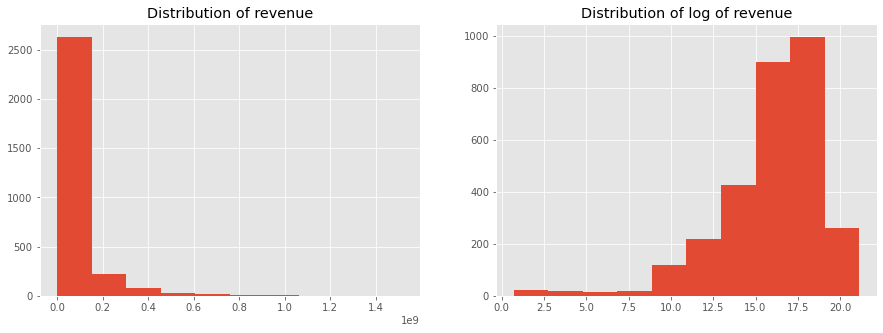

In [76]:
# Revenue
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(new_train.revenue)
plt.title("Distribution of revenue")
plt.subplot(1, 2, 2)
plt.hist(np.log1p(new_train.revenue))
plt.title("Distribution of log of revenue")
plt.show()

In [77]:
new_train['log_revenue'] = np.log1p(new_train.revenue)

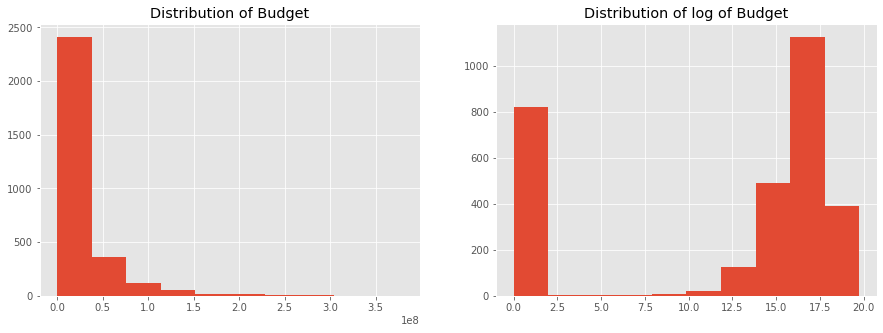

In [78]:
# Budget
fig, ax = plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(new_train.budget)
plt.title("Distribution of Budget")
plt.subplot(1, 2, 2)
plt.hist(np.log1p(new_train.budget))
plt.title("Distribution of log of Budget")
plt.show()

And now, we must think of the correlation between these two feature, and visualize it.

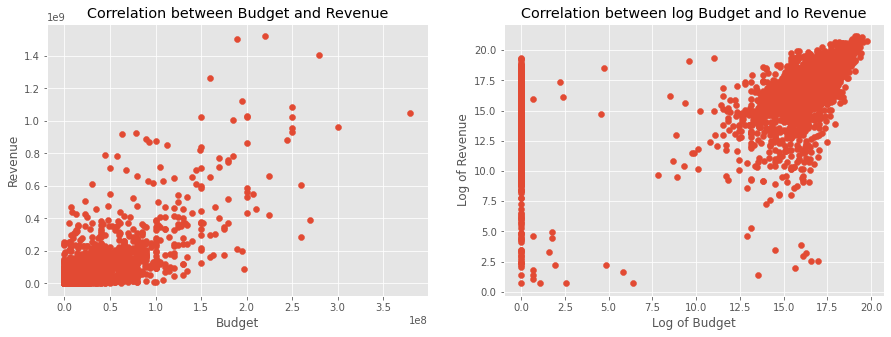

In [79]:
# Correlation scatter graphs
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(new_train.budget, new_train.revenue)
plt.title("Correlation between Budget and Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(new_train.budget), new_train.log_revenue)
plt.title("Correlation between log Budget and lo Revenue")
plt.xlabel("Log of Budget")
plt.ylabel("Log of Revenue")
plt.show()

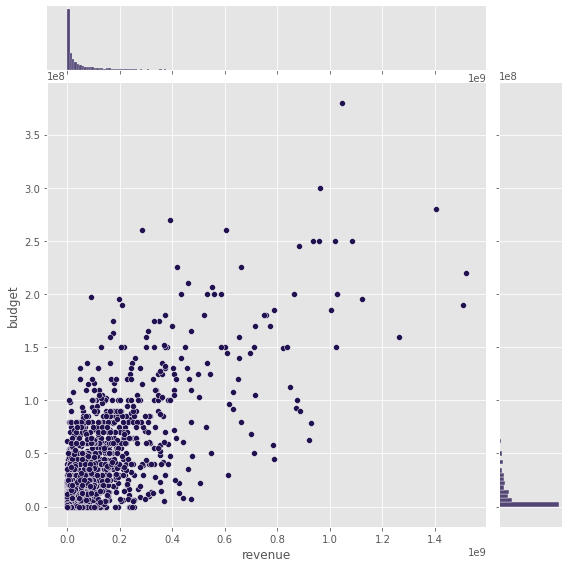

In [184]:
sns.set_palette('magma')
sns.jointplot(x='revenue', y='budget', data=new_train, height=8, ratio=6)
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

It seems budget and revenue are a little bit correlated. Also, logarithmic opeartion on features turn budget to more managable, right?

In [80]:
new_train['log_budget'] = np.log1p(new_train.budget)
new_test['log_budget'] = np.log1p(new_test.budget)

Other feature is the homepage.

In [81]:
new_train.homepage.value_counts().head()

http://www.transformersmovie.com/               4
http://www.thehobbit.com/                       2
http://www.lordoftherings.net/                  2
http://sonyclassics.com/whiplash/               1
https://www.facebook.com/thefinesthoursmovie    1
Name: homepage, dtype: int64

Nearly all homepages are unique, maybe it is not gonna necessary for us.

In [82]:
new_train['has_homepage'] = 0
new_train.loc[new_train.homepage.isnull() == False, 'has_homepage'] = 1
# Same thing for the test dataset
new_test['has_homepage'] = 0
new_test.loc[new_test.homepage.isnull() == False, 'has_homepage'] = 1

There it is! Now, let's visualize it.

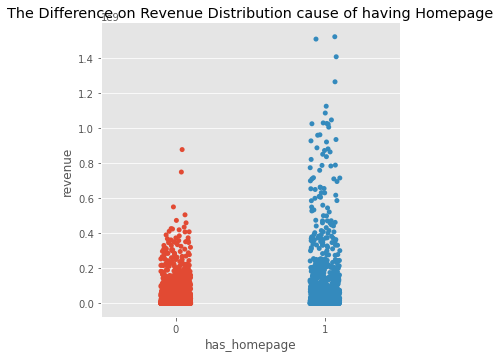

In [83]:
sns.catplot(x='has_homepage', y='revenue', data=new_train)
plt.title("The Difference on Revenue Distribution cause of having Homepage")
plt.xlabel('has_homepage')
plt.ylabel('revenue')
plt.show()

Films with homepage cause of more income.

**Original Language**

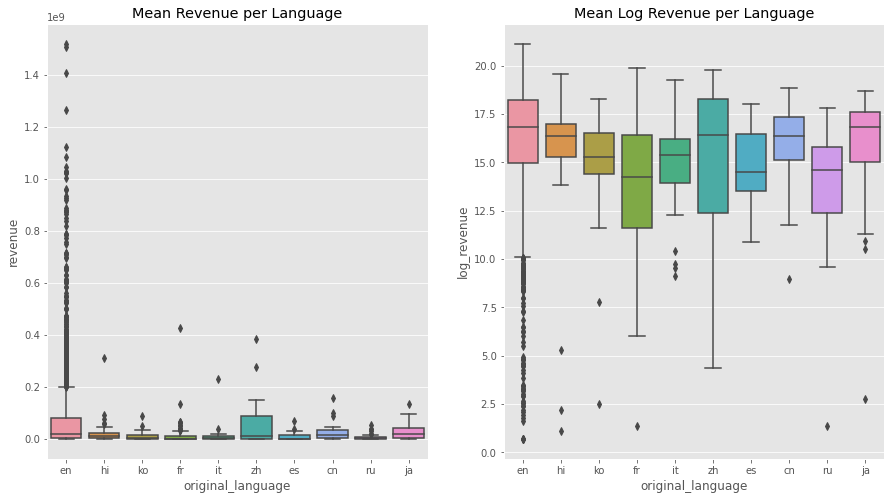

In [84]:
# Let's see what we have
data = new_train.loc[new_train['original_language'].isin(new_train['original_language'].value_counts().head(10).index)]
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=data)
plt.title("Mean Revenue per Language")
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=data)
plt.title("Mean Log Revenue per Language")
plt.show()

English language is more used than other languages, and it has a high range of values. The films that have highest income are used english but also, there are a some films that have high revenue without in english.

**Original title** <br>It contains title of films. 
I am curious about what are the common word in titles. Let's visualize at them with word cloud.

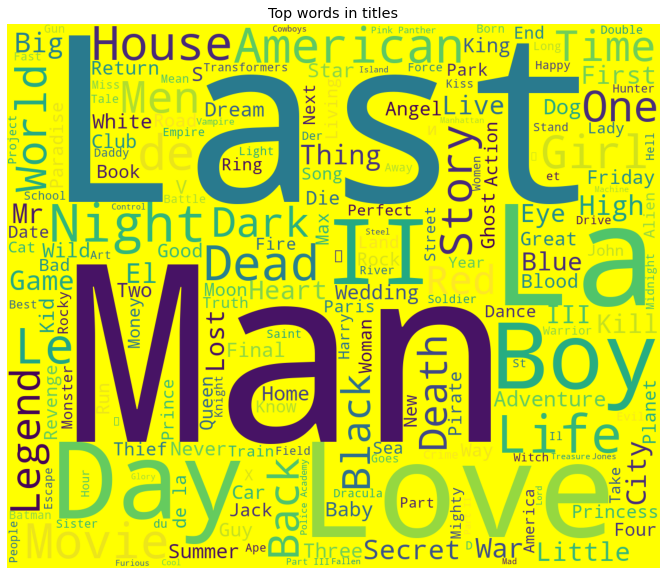

In [85]:
plt.figure(figsize=(15,10))
txt = ' '.join(new_train.original_title.values)
wrdCloud = wc(max_font_size=None, background_color='yellow', width=1200, height=1000).generate(txt)
plt.imshow(wrdCloud)
plt.title("Top words in titles")
plt.axis("off")
plt.show()

**Overview**

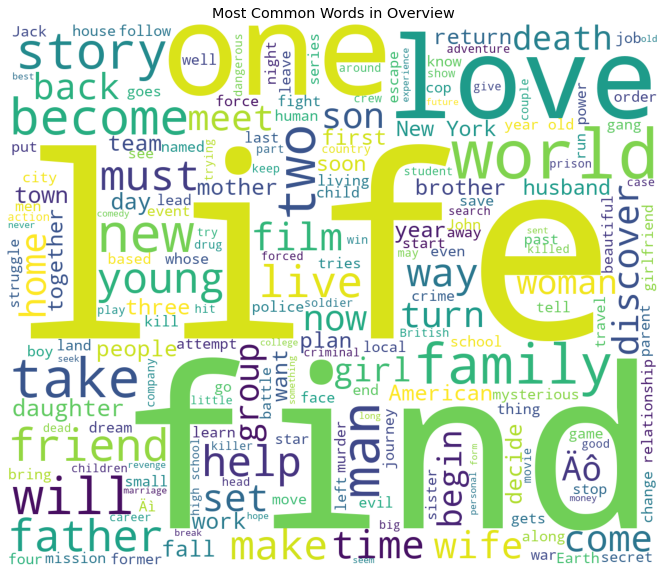

In [86]:
plt.figure(figsize=(15,10))
txt = ' '.join(new_train.overview.fillna("").values)
wrdCloud = wc(background_color='white', width=1200, height=1000).generate(txt)
plt.imshow(wrdCloud)
plt.title("Most Common Words in Overview")
plt.axis('off')
plt.show()

After that, the most important goal is come: Affect of these words on the income/revenue. It can be figured out with eli5 library

In [87]:
vectorizer = TfidfVectorizer(sublinear_tf=True, analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2),
                            min_df=5)

text_overview = vectorizer.fit_transform(new_train.overview.fillna(''))
lg = LinearRegression()
lg.fit(text_overview, new_train.log_revenue)
eli.show_weights(lg, vec=vectorizer, top=20, feature_filter=lambda x: x!= '<BIAS>')

In [88]:
print('Target value: ', new_train.log_revenue[1000])
eli.show_prediction(lg, doc=new_train.overview.values[1000], vec=vectorizer)

Target value:  16.44583954907521


As we can see the impacts of some words on the revenue feature, but there is a more complicated model is required to getting better information. 

**Popularity**

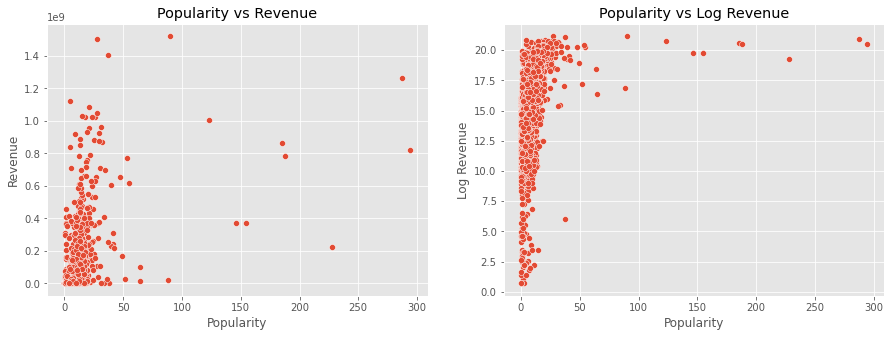

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='popularity', y='revenue', data=new_train)
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")

plt.subplot(1,2,2)
sns.scatterplot(x='popularity', y='log_revenue', data=new_train)
plt.title('Popularity vs Log Revenue')
plt.xlabel("Popularity")
plt.ylabel("Log Revenue")
plt.show()

It seems we have low corr between popularity and revenue (target).

**Release Date**

In [90]:
new_test.loc[new_test.release_date.isnull() == True, 'release_date'] = '01/01/98'

In [91]:
def fix_date(c):
    """
    Fixes dates which are in 20xx
    """
    year = c.split('/')[2]
    if int(year) <= 19:
        return c[:-2] + '20' + year
    else:
        return c[:-2] + '19' + year

In [92]:
# Applying this function
new_train.release_date = new_train.release_date.apply(lambda x: fix_date(x))
new_test.release_date = new_test.release_date.apply(lambda x: fix_date(x))
new_train.release_date = pd.to_datetime(new_train.release_date)
new_test.release_date = pd.to_datetime(new_test.release_date)

In [93]:
# create date features for datasets
def generate_date(df):
    date_list = ['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']
    for i in date_list:
        date_col = 'release_date' + '_' + i
        df[date_col] = getattr(df['release_date'].dt, i).astype(int)
        
    return df

In [94]:
new_train = generate_date(new_train)
new_test = generate_date(new_test)

In [95]:
new_train.head()

id    budget                           homepage    imdb_id  \
0   1  14000000                                NaN  tt2637294   
1   2  40000000                                NaN  tt0368933   
2   3   3300000  http://sonyclassics.com/whiplash/  tt2582802   
3   4   1200000         http://kahaanithefilm.com/  tt1821480   
4   5         0                                NaN  tt1380152   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
3                hi                                   Kahaani   
4                ko                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path release_date  runtime    status  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   2015-02-20     93.0  Released   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   2004-08-06    113.0  Released   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   2014-10-10    105.0  Released   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   2012-03-09    122.0  Released   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   2009-02-05    118.0  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title   revenue  \
0                    Hot Tub Time Machine 2  12314651   
1  The Princess Diaries 2: Royal Engagement  95149435   
2                                  Whiplash  13092000   
3                                   Kahaani  16000000   
4                                Marine Boy   3923970   

                  collection_names  has_collection  genres_numbers  \
0  Hot Tub Time Machine Collection               1               1   
1  The Princess Diaries Collection               1               4   
2                                0               0               1   
3                                0               0               2   
4                                0               0               2   

                    all_genres  genre_Drama  genre_Comedy  genre_Thriller  \
0                       Comedy            0             1               0   
1  Comedy Drama Family Romance            1             1               0   
2                        Drama            1             0               0   
3               Drama Thriller            1             0               1   
4              Action Thriller            0             0               1   

   genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  \
0             0              0            0                0             0   
1             0              1            0                0             0   
2             0              0            0                0             0   
3             0              0            0                0             0   
4             1              0            0                0             0   

   genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0                      0             0              0              0   
1                      0             1              0              0   
2                      0             0              0              0   
3                      0             0              0           

With this operations we can arange some parameters in easier way. Let's visualize the release times of films with plotly

In [96]:
data1 = new_train.release_date_year.value_counts().sort_index()
data2 = new_test.release_date_year.value_counts().sort_index()

data = [go.Scatter(x=data1.index, y=data1.values, name='train_data'), go.Scatter(x=data2.index, y=data2.values, name='test_data')]

layout = go.Layout(dict(title="Number of films per year",
                       xaxis=dict(title='year'),
                       yaxis=dict(title='Count')),
                  legend=dict(orientation='v'))
py.iplot(dict(data=data, layout=layout))

In [97]:
d1 = new_train.release_date_year.value_counts().sort_index()
d2 = new_train.groupby(['release_date_year']).revenue.sum()

data1 = go.Scatter(x=d1.index, y=d1.values, name='count_film')
data2 = go.Scatter(x=d2.index, y=d2.values, name='total_revenue', yaxis='y2')
data = [data1, data2]
layout = go.Layout(dict(title="Number of films and total revenue per year",
                       xaxis=dict(title='Year'),
                       yaxis=dict(title='Count'),
                       yaxis2=dict(title='Total Revenue', overlaying='y', side='right')),
                  legend=dict(orientation='v', xanchor='left', x=1.1))
py.iplot(dict(data=data, layout=layout))

In [98]:
new_train.pivot_table(values=['revenue'], index='release_date_year', aggfunc='mean').values

array([[2.50000000e+06],
       [1.21388000e+06],
       [2.25505000e+04],
       [9.66878000e+05],
       [5.13939000e+05],
       [5.05699000e+05],
       [7.94000000e+03],
       [1.61959450e+06],
       [1.06467500e+06],
       [2.73000000e+06],
       [3.20200000e+06],
       [3.96375000e+06],
       [4.00000000e+06],
       [3.81318925e+06],
       [8.50000000e+06],
       [6.27783333e+06],
       [1.40331200e+06],
       [1.08315000e+07],
       [1.10950965e+07],
       [3.97648050e+06],
       [3.19907000e+06],
       [1.91067450e+06],
       [2.53173150e+06],
       [1.32625000e+07],
       [5.52400000e+04],
       [2.76016085e+07],
       [1.23190522e+07],
       [1.63049421e+07],
       [3.91250000e+07],
       [1.37166667e+07],
       [2.75446800e+06],
       [3.95550000e+07],
       [1.54776250e+07],
       [1.21750000e+07],
       [1.53659692e+07],
       [2.81763272e+07],
       [3.30740915e+07],
       [4.33339660e+07],
       [1.37451406e+07],
       [3.49267431e+07],


In [99]:
new_train.groupby(['release_date_year']).revenue.mean().values

array([2.50000000e+06, 1.21388000e+06, 2.25505000e+04, 9.66878000e+05,
       5.13939000e+05, 5.05699000e+05, 7.94000000e+03, 1.61959450e+06,
       1.06467500e+06, 2.73000000e+06, 3.20200000e+06, 3.96375000e+06,
       4.00000000e+06, 3.81318925e+06, 8.50000000e+06, 6.27783333e+06,
       1.40331200e+06, 1.08315000e+07, 1.10950965e+07, 3.97648050e+06,
       3.19907000e+06, 1.91067450e+06, 2.53173150e+06, 1.32625000e+07,
       5.52400000e+04, 2.76016085e+07, 1.23190522e+07, 1.63049421e+07,
       3.91250000e+07, 1.37166667e+07, 2.75446800e+06, 3.95550000e+07,
       1.54776250e+07, 1.21750000e+07, 1.53659692e+07, 2.81763272e+07,
       3.30740915e+07, 4.33339660e+07, 1.37451406e+07, 3.49267431e+07,
       1.94269206e+07, 2.71495658e+07, 3.32051090e+07, 3.45903005e+07,
       4.08584592e+07, 6.44782768e+07, 5.91002738e+07, 9.04803795e+07,
       7.39755223e+07, 5.38526955e+07, 2.82970542e+07, 5.58904830e+07,
       3.34882853e+07, 3.52906241e+07, 3.75673118e+07, 1.79894907e+07,
      

In [100]:
d1 = new_train.release_date_year.value_counts().sort_index()
d2 = new_train.groupby(['release_date_year']).revenue.mean()

data1 = go.Scatter(x=d1.index, y=d1.values, name='film count')
data2 = go.Scatter(x=d2.index, y=d2.values, name='mean', yaxis='y2')

data = [data1, data2]

layout = go.Layout(dict(title='Number of Films and Average Revenue per Year',
                       xaxis=dict(title='Year'),
                       yaxis=dict(title='Count'),
                       yaxis2=dict(title='Avg Revenue', side='right', overlaying='y')),
                   legend=dict(orientation='v', xanchor='left', x=1.1))

py.iplot(dict(data=data, layout=layout))

The quantity of films produced and overall income are both increasing. However, there have been years in the past when there were a large number of popular films that brought in a lot of income.

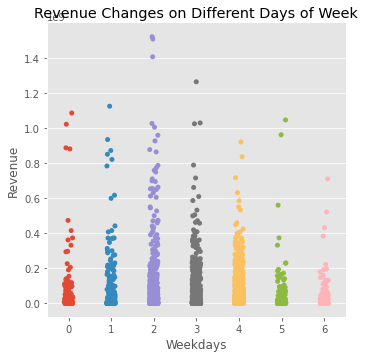

In [101]:
# Let's do first look at weekdays' aspects on revenue
sns.catplot(x='release_date_weekday', y='revenue', data=new_train)
plt.title("Revenue Changes on Different Days of Week")
plt.xlabel('Weekdays')
plt.ylabel('Revenue')
plt.show()

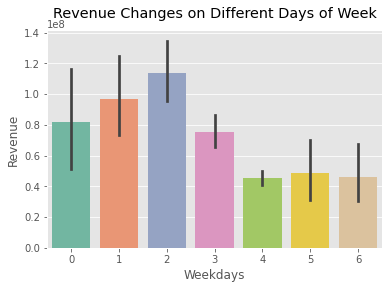

In [102]:
sns.set_palette('Set2')
sns.barplot(x='release_date_weekday', y='revenue', data=new_train)
plt.title("Revenue Changes on Different Days of Week", y=1.03)
plt.xlabel('Weekdays')
plt.ylabel('Revenue')
plt.show()

The value of revenue increase more on wednesdays.

**Runtime** <br>It means duration of films in minute format.

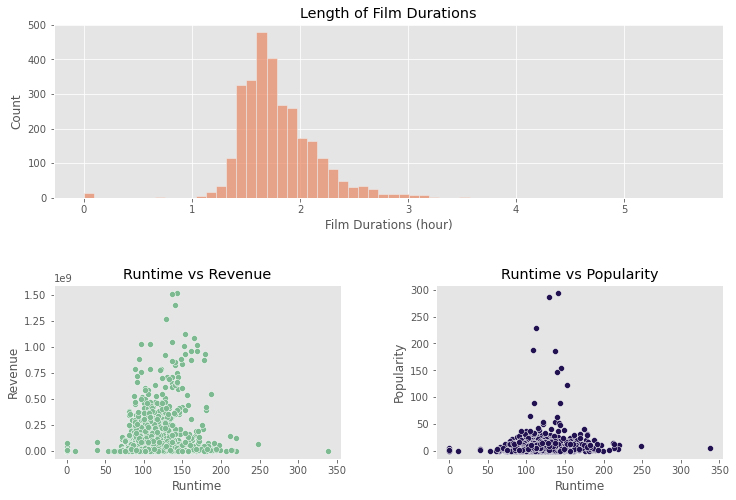

In [103]:
sns.set_palette("flare")
plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2,4)
gs.update(wspace=1, hspace=0.5)

plt.subplot(gs[0, :], projection=None)
sns.histplot(new_train.runtime.fillna(0) / 60, bins=60)
plt.title("Length of Film Durations")
plt.xlabel("Film Durations (hour)")

sns.set_palette("crest")
plt.subplot(gs[1, :2])
sns.scatterplot(new_train.runtime.fillna(0), new_train.revenue)
plt.title("Runtime vs Revenue")
plt.xlabel("Runtime")
plt.ylabel("Revenue")
plt.grid(False)

sns.set_palette("magma")
plt.subplot(gs[1, 2:])
sns.scatterplot(new_train.runtime.fillna(0), new_train.popularity)
plt.title("Runtime vs Popularity")
plt.xlabel("Runtime")
plt.ylabel("Popularity")
plt.grid(False)

plt.show()

We can get that most of films have higher popularity and revenue if they've around 1.5-2 hour duration.

<strong>Status</strong>

In [104]:
new_train[['status']].value_counts()

status  
Released    2996
Rumored        4
dtype: int64

Status feature has two different component in its inside for train dataframe:
1. Released --> If the film has been released its status is this.
2. Rumored --> If the film has not been released yet, then its status is this.

In [105]:
new_test.status.value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

This feature is not gonna be useful for us because of train df and test df have different range for released films :(

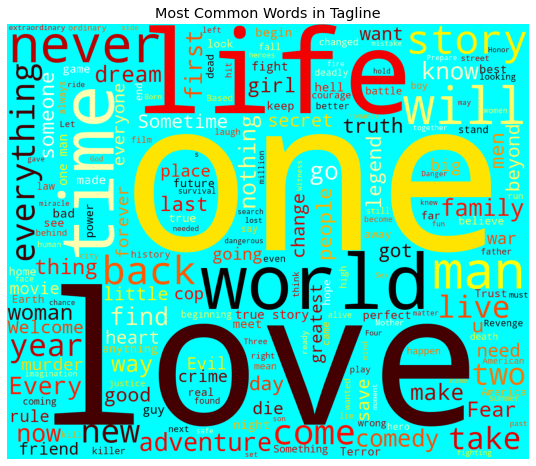

In [106]:
# Most common words in tagline
plt.figure(figsize=(12,8))
txt = ' '.join(new_train.tagline.fillna('').values)
wrdCloud = wc(width=1200, height=1000, background_color='cyan', colormap='hot').generate(txt)
plt.imshow(wrdCloud)
plt.title("Most Common Words in Tagline")
plt.axis('off')
plt.show()

<b>Has Collections</b>

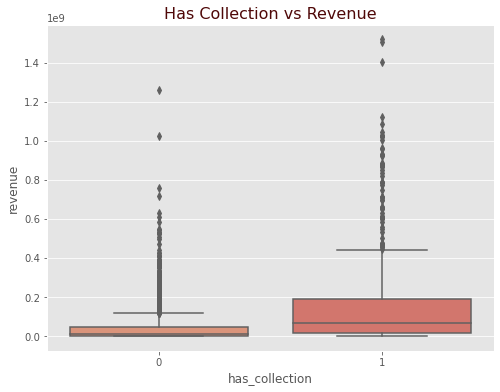

In [107]:
sns.set_palette('flare')
plt.figure(figsize=(8,6))
sns.boxplot(x='has_collection', y='revenue', data=new_train)
plt.title("Has Collection vs Revenue", fontdict=dict(color='#4F0808', fontsize=16))
plt.show()

It seems films that are a participants of a collection have higher revenue.

<b>Genres</b>

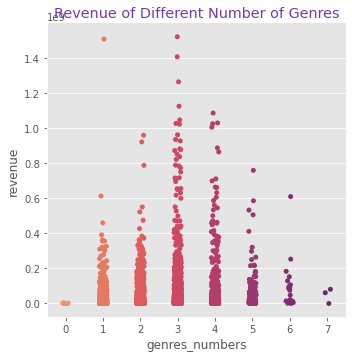

In [108]:
sns.catplot(x='genres_numbers', y='revenue', data=new_train, kind='strip', palette='flare')
plt.title("Revenue of Different Number of Genres", fontdict=dict(color='#7539A9'))
plt.show()

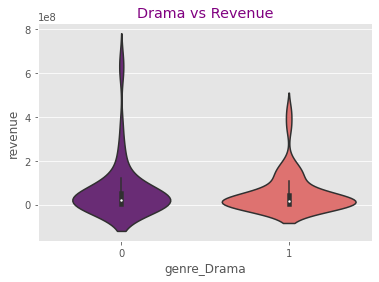

In [109]:
sns.violinplot(x='genre_Drama', y='revenue', data=new_train[:100], palette='magma')
plt.title("Drama vs Revenue", color='purple')
plt.show()

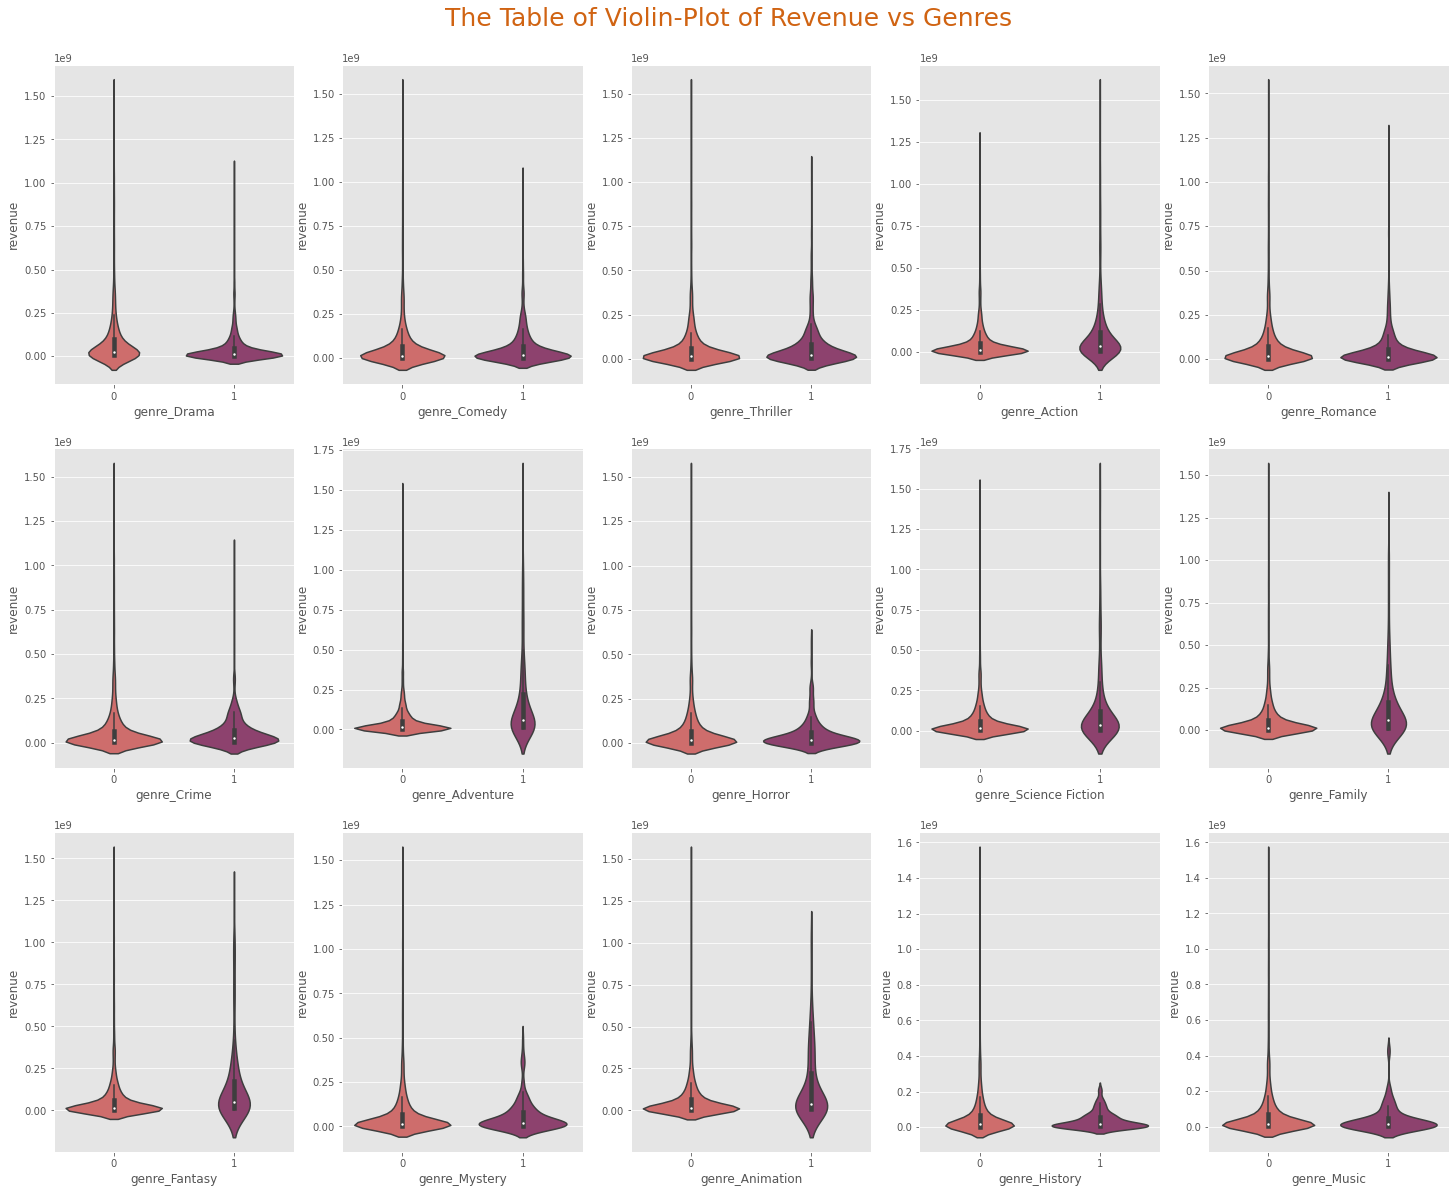

In [110]:
fig, ax = plt.subplots(3, 5, figsize=(25, 20))
plt.suptitle("The Table of Violin-Plot of Revenue vs Genres", fontsize=25, y=0.92, color='#D06312')
for i, e in enumerate([col for col in new_train.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=new_train, ax=ax[i//5][i%5], palette='flare')

We can see that some genres have positive impact on revenue, but some values do not.

<b>Production Companies</b>

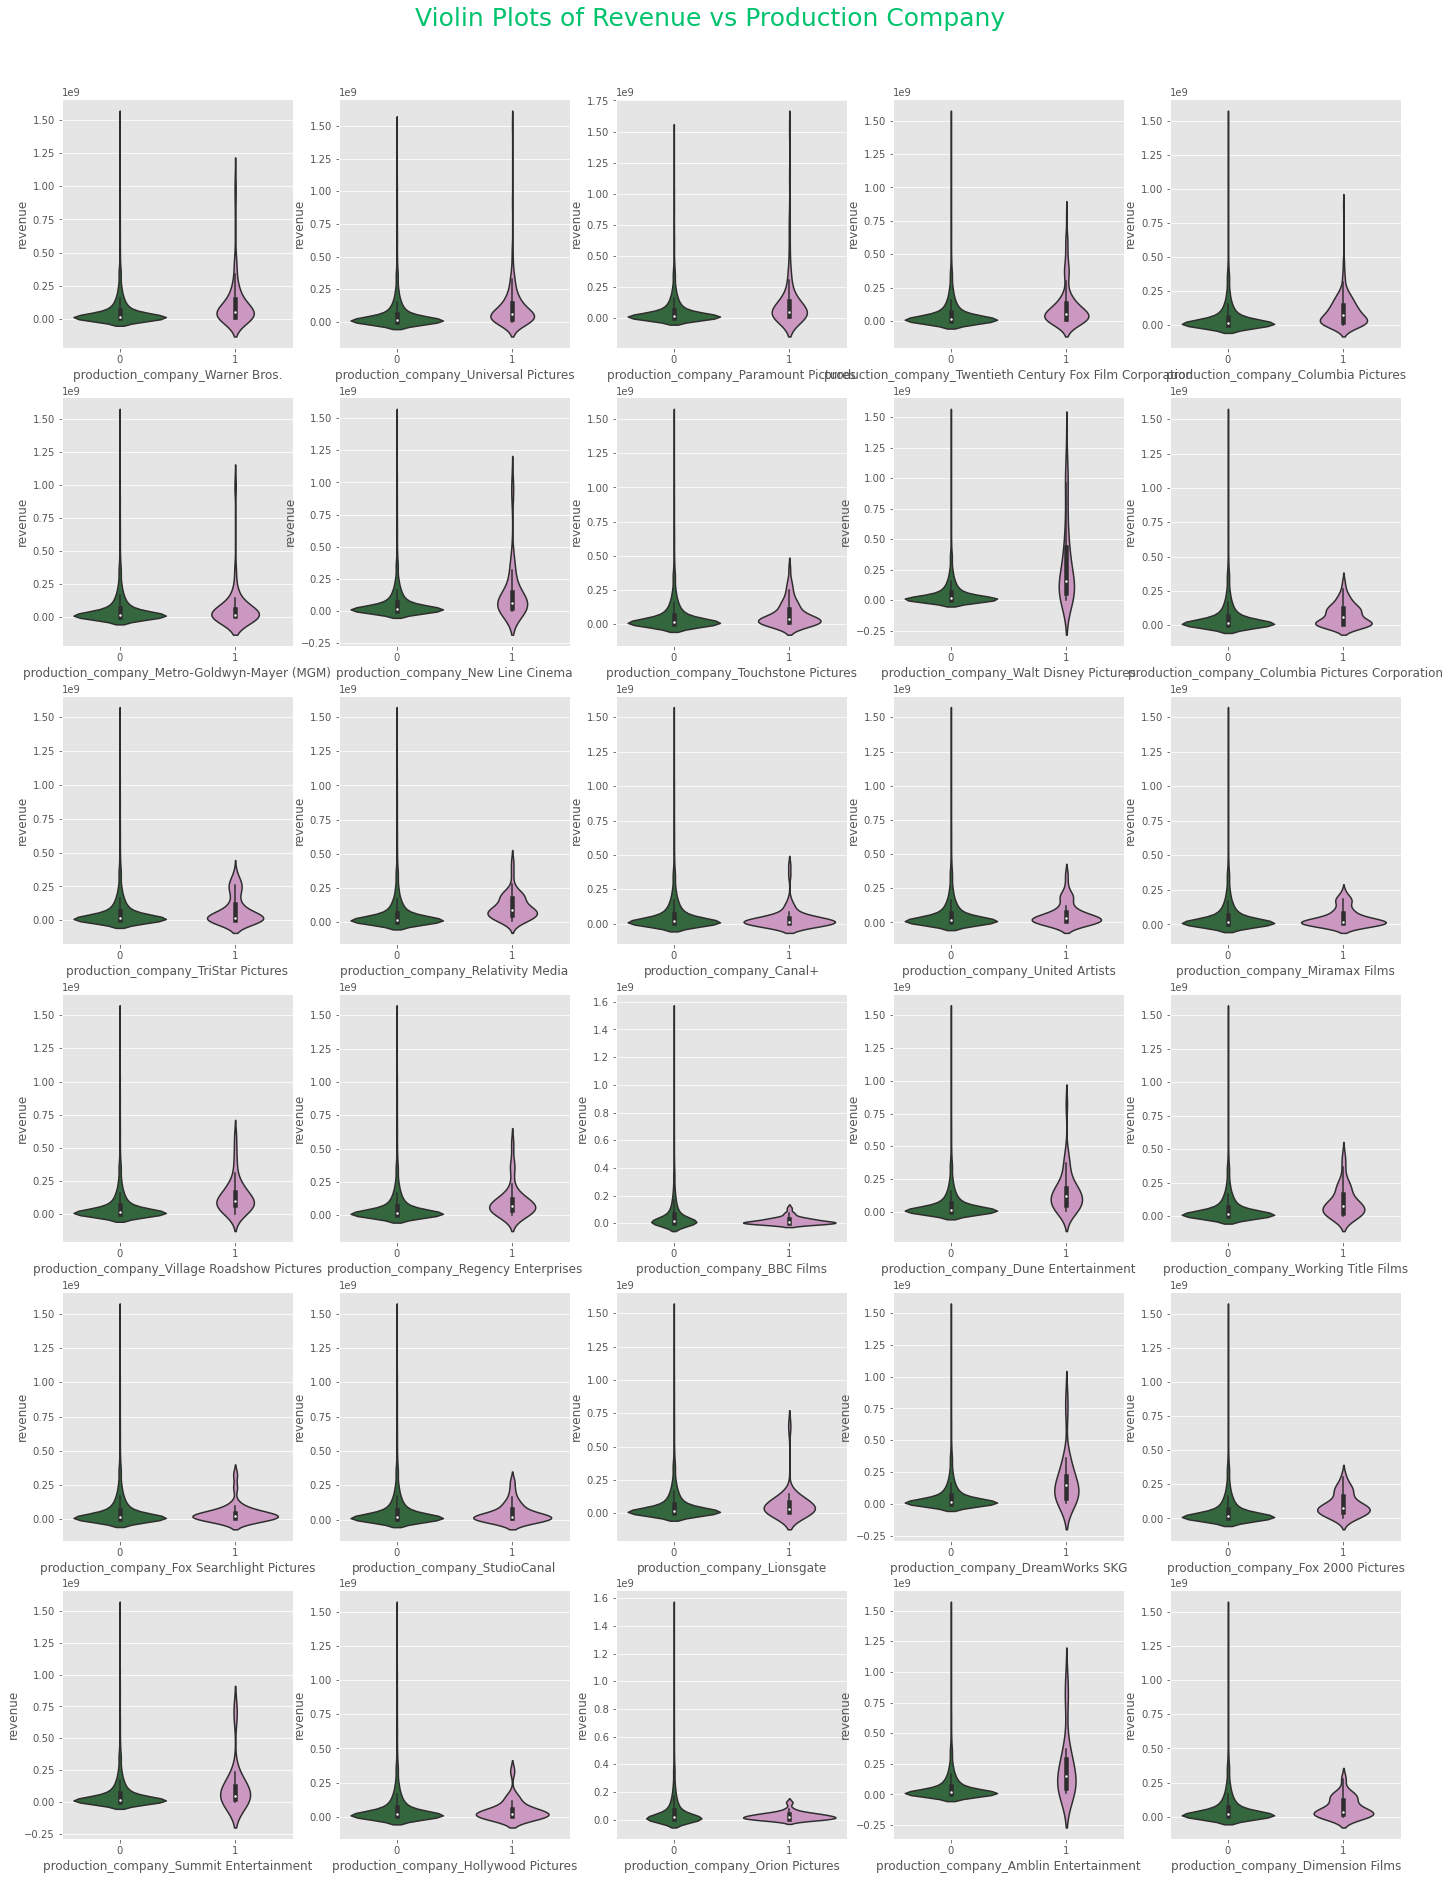

In [111]:
fig, ax = plt.subplots(6, 5, figsize=(24,32))
plt.suptitle("Violin Plots of Revenue vs Production Company", color='#00C36D', fontsize=25, y=0.92)
for ind, e in enumerate([col for col in new_train.columns if 'production_company' in col]):
    sns.violinplot(x=e, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='cubehelix')

There are just a couple of companies nearly worth for revenue.

<b>Production Countries</b>

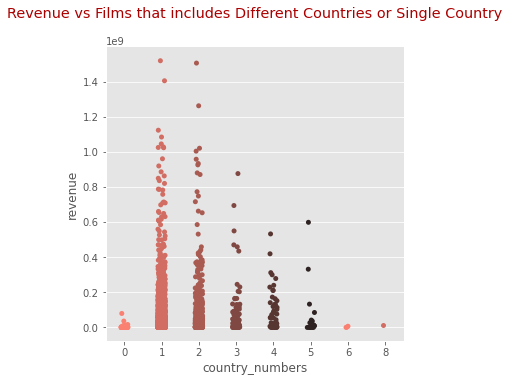

In [112]:
sns.catplot(x='country_numbers', y='revenue', data=new_train, palette=sns.color_palette('dark:salmon_r'))
plt.title("Revenue vs Films that includes Different Countries or Single Country", color='#AB0000', y=1.08)
plt.show()

Most of films produced in 1 or 2 countries.

In [113]:
np.sum([1 for col in new_train.columns if 'production_country' in col])

25

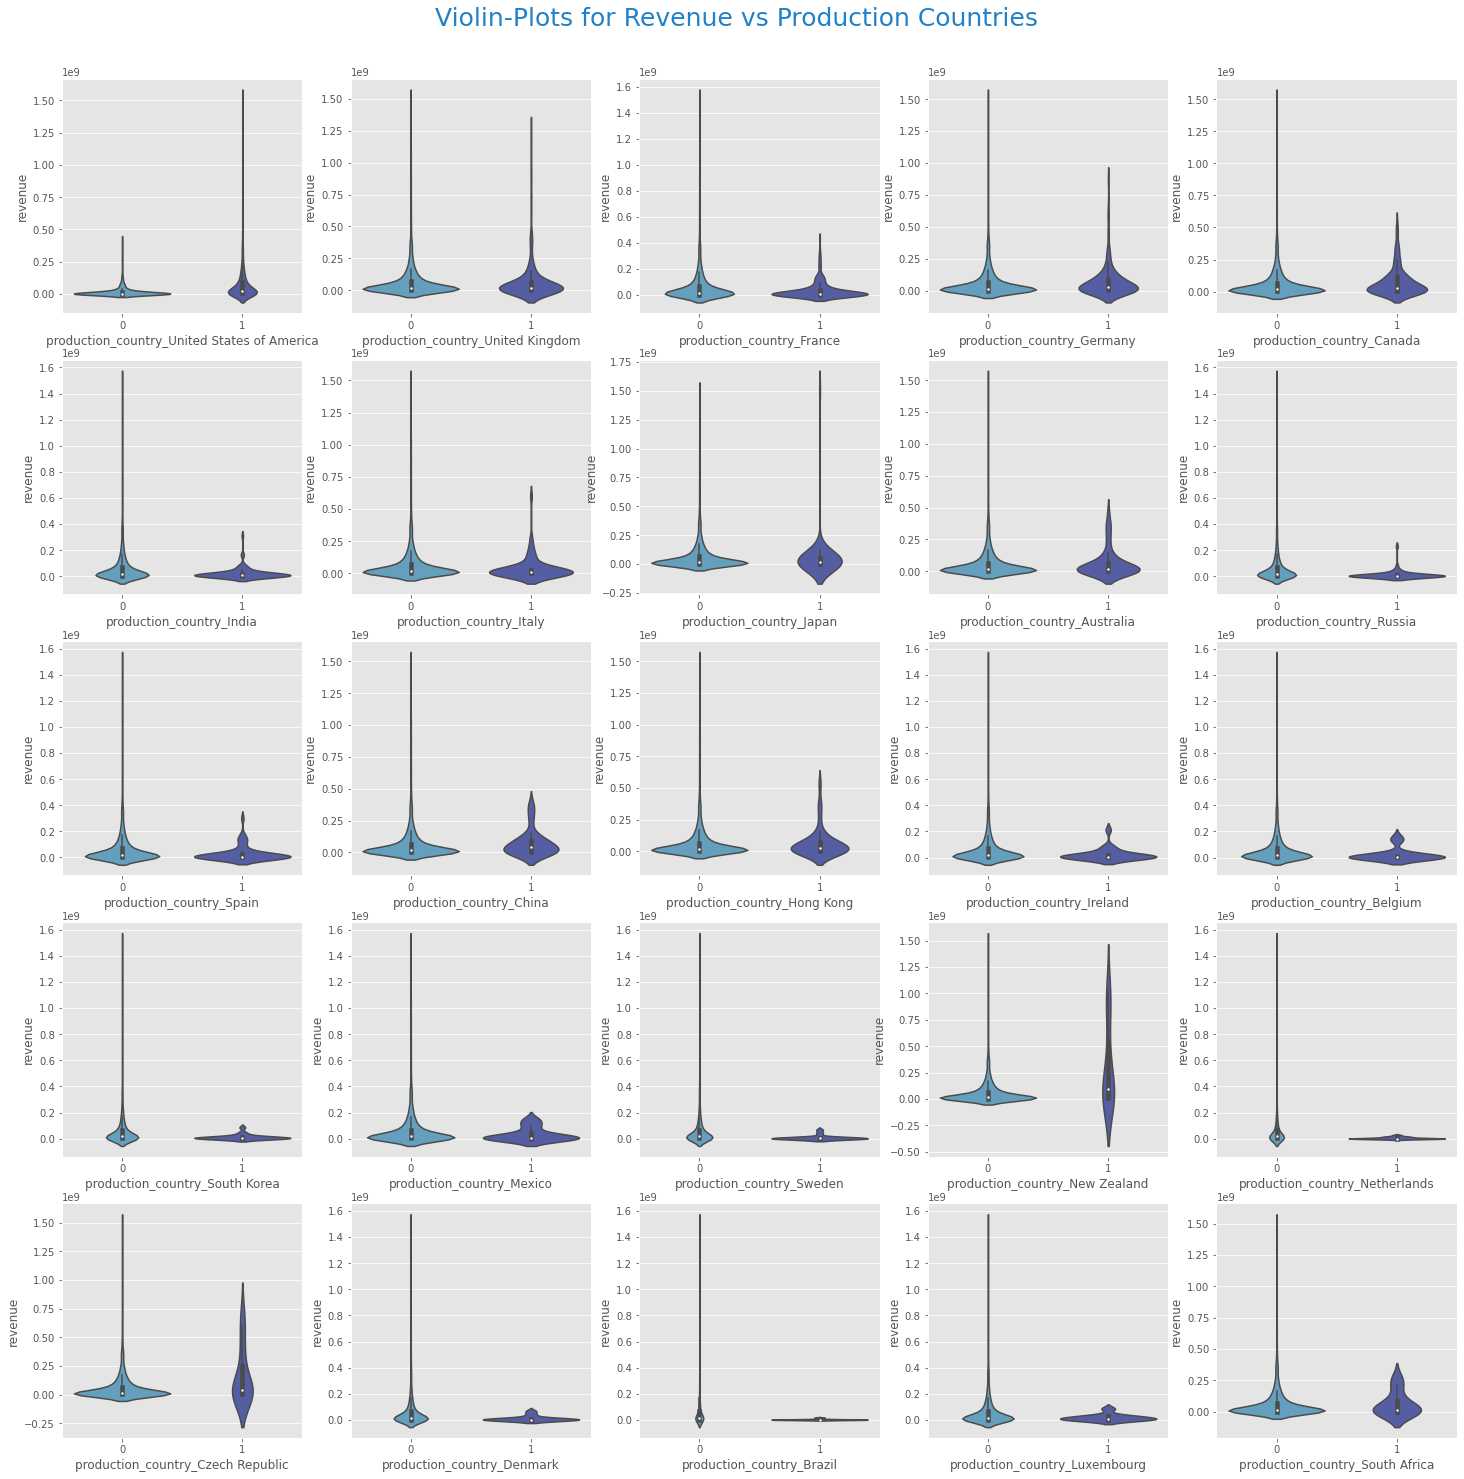

In [114]:
fig, ax = plt.subplots(5, 5, figsize=(25,25))
plt.suptitle("Violin-Plots for Revenue vs Production Countries", color='#2181C8', y=0.92, fontsize=25)
for ind, val in enumerate([col for col in new_train.columns if 'production_country' in col]):
    sns.violinplot(x=val, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette=sns.color_palette('icefire'))
plt.show()

There are just a couple of countries that have positive affect on revenue, so probably this feature won't be so critique for us.

<b>Cast</b>

In [115]:
[i for i in new_train.columns if 'cast' in i]

['cast_numbers',
 'cast_name_Samuel L. Jackson',
 'cast_name_Robert De Niro',
 'cast_name_Morgan Freeman',
 'cast_name_J.K. Simmons',
 'cast_name_Bruce Willis',
 'cast_name_Liam Neeson',
 'cast_name_Susan Sarandon',
 'cast_name_Bruce McGill',
 'cast_name_John Turturro',
 'cast_name_Forest Whitaker',
 'cast_name_Willem Dafoe',
 'cast_name_Bill Murray',
 'cast_name_Owen Wilson',
 'cast_name_Nicolas Cage',
 'cast_name_Sylvester Stallone',
 'gender_0_cast',
 'gender_1_cast',
 'gender_2_cast',
 'cast_char_',
 'cast_char_Himself',
 'cast_char_Herself',
 'cast_char_Dancer',
 'cast_char_Additional Voices (voice)',
 'cast_char_Doctor',
 'cast_char_Reporter',
 'cast_char_Waitress',
 'cast_char_Nurse',
 'cast_char_Bartender',
 'cast_char_Jack',
 'cast_char_Debutante',
 'cast_char_Security Guard',
 'cast_char_Paul',
 'cast_char_Frank']

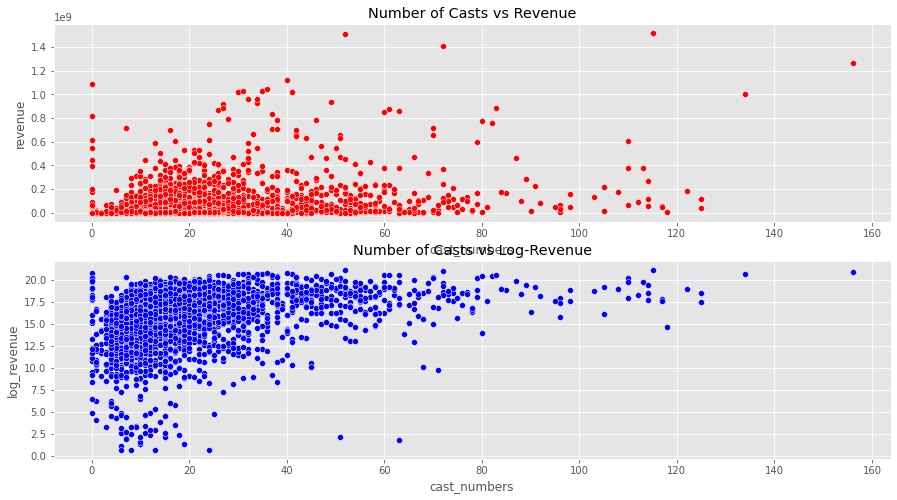

In [116]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1,)
sns.scatterplot(x=new_train.cast_numbers, y=new_train.revenue, color='red')
plt.title("Number of Casts vs Revenue")

plt.subplot(2,1,2)
sns.scatterplot(x=new_train.cast_numbers, y=new_train.log_revenue, color='blue')
plt.title("Number of Casts vs Log-Revenue")

plt.show()

In [117]:
np.sum([1 for i in new_train if 'cast_name' in i])

15

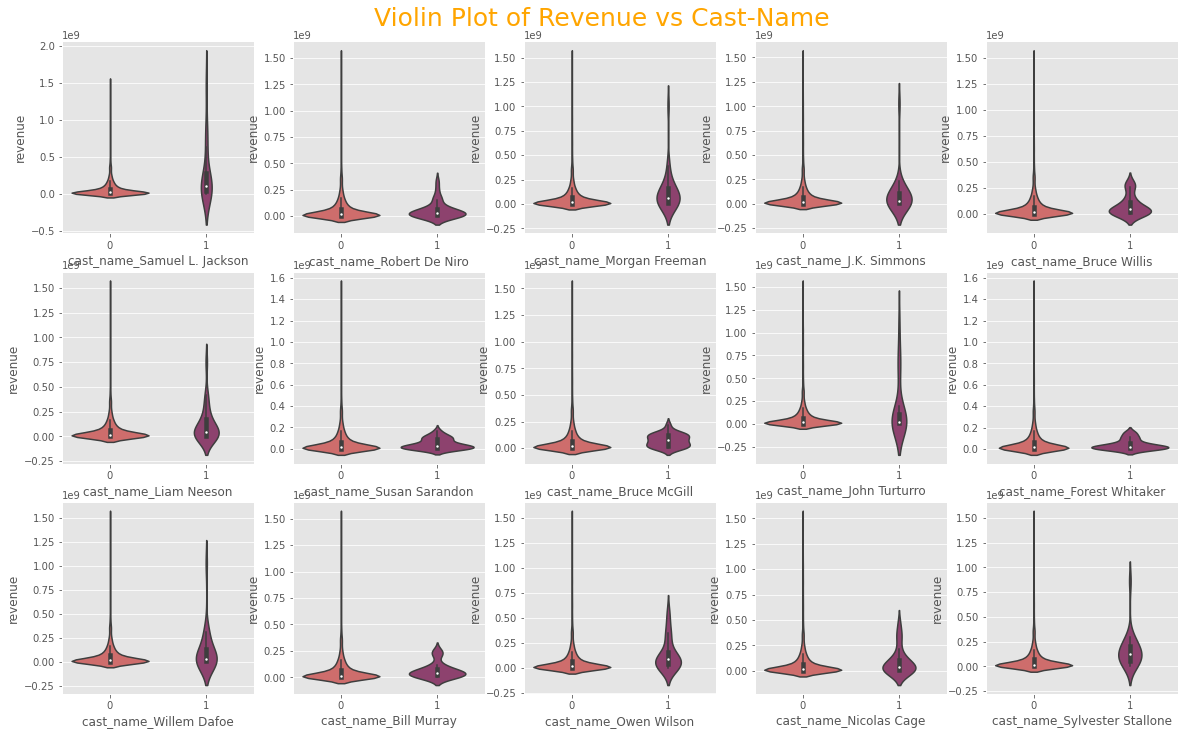

In [118]:
fig, ax = plt.subplots(3, 5, figsize=(20,12), )
plt.suptitle("Violin Plot of Revenue vs Cast-Name", color='orange', fontsize=25, y=0.92)
for ind, v in enumerate([col for col in new_train.columns if 'cast_name' in col]):
    sns.violinplot(x=v, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='flare')
plt.show()

In [119]:
# The same operation for cast_char columns
np.sum([1 for col in new_train.columns if 'cast_char_' in col])
# so we can create a subplots by this number

15

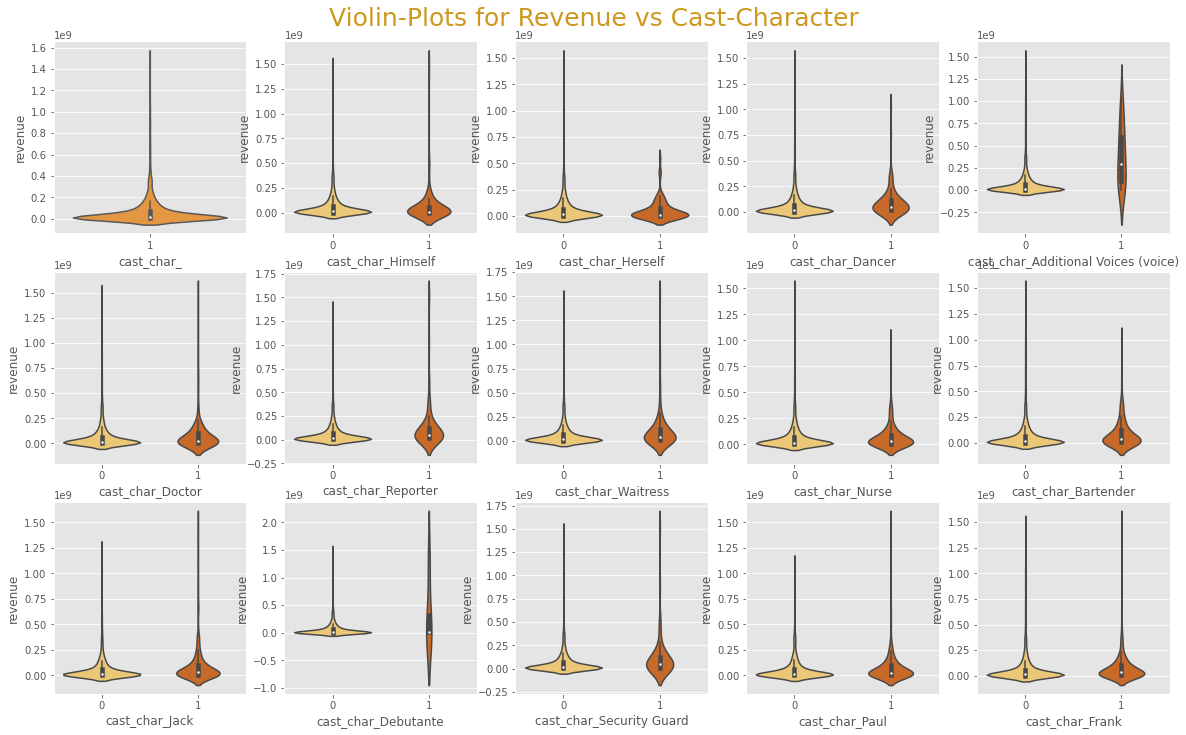

In [120]:
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
plt.suptitle("Violin-Plots for Revenue vs Cast-Character", y=0.92, fontsize=25, color='#CD981D')
for ind, val in enumerate([col for col in new_train.columns if 'cast_char_' in col]):
    sns.violinplot(x=val, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='YlOrBr')
plt.show()

It seems most of characters are useful for increasing revenue, and it is a good thing right! So, this feature probably be handy for our model.

<b>Keywords</b>

In [121]:
"""counter = 0
for i in new_train.columns:
    if 'keyword' in i:
        counter += 1
print(counter)"""
np.sum([1 for i in new_train.columns if 'keyword_' in i])

31

In [122]:
[i for i in new_train.columns if 'keyword_' in i]

['keyword_numbers',
 'keyword_woman director',
 'keyword_independent film',
 'keyword_duringcreditsstinger',
 'keyword_murder',
 'keyword_based on novel',
 'keyword_violence',
 'keyword_sport',
 'keyword_biography',
 'keyword_aftercreditsstinger',
 'keyword_dystopia',
 'keyword_revenge',
 'keyword_friendship',
 'keyword_sex',
 'keyword_suspense',
 'keyword_sequel',
 'keyword_love',
 'keyword_police',
 'keyword_teenager',
 'keyword_nudity',
 'keyword_female nudity',
 'keyword_drug',
 'keyword_prison',
 'keyword_musical',
 'keyword_high school',
 'keyword_los angeles',
 'keyword_new york',
 'keyword_family',
 'keyword_father son relationship',
 'keyword_kidnapping',
 'keyword_investigation']

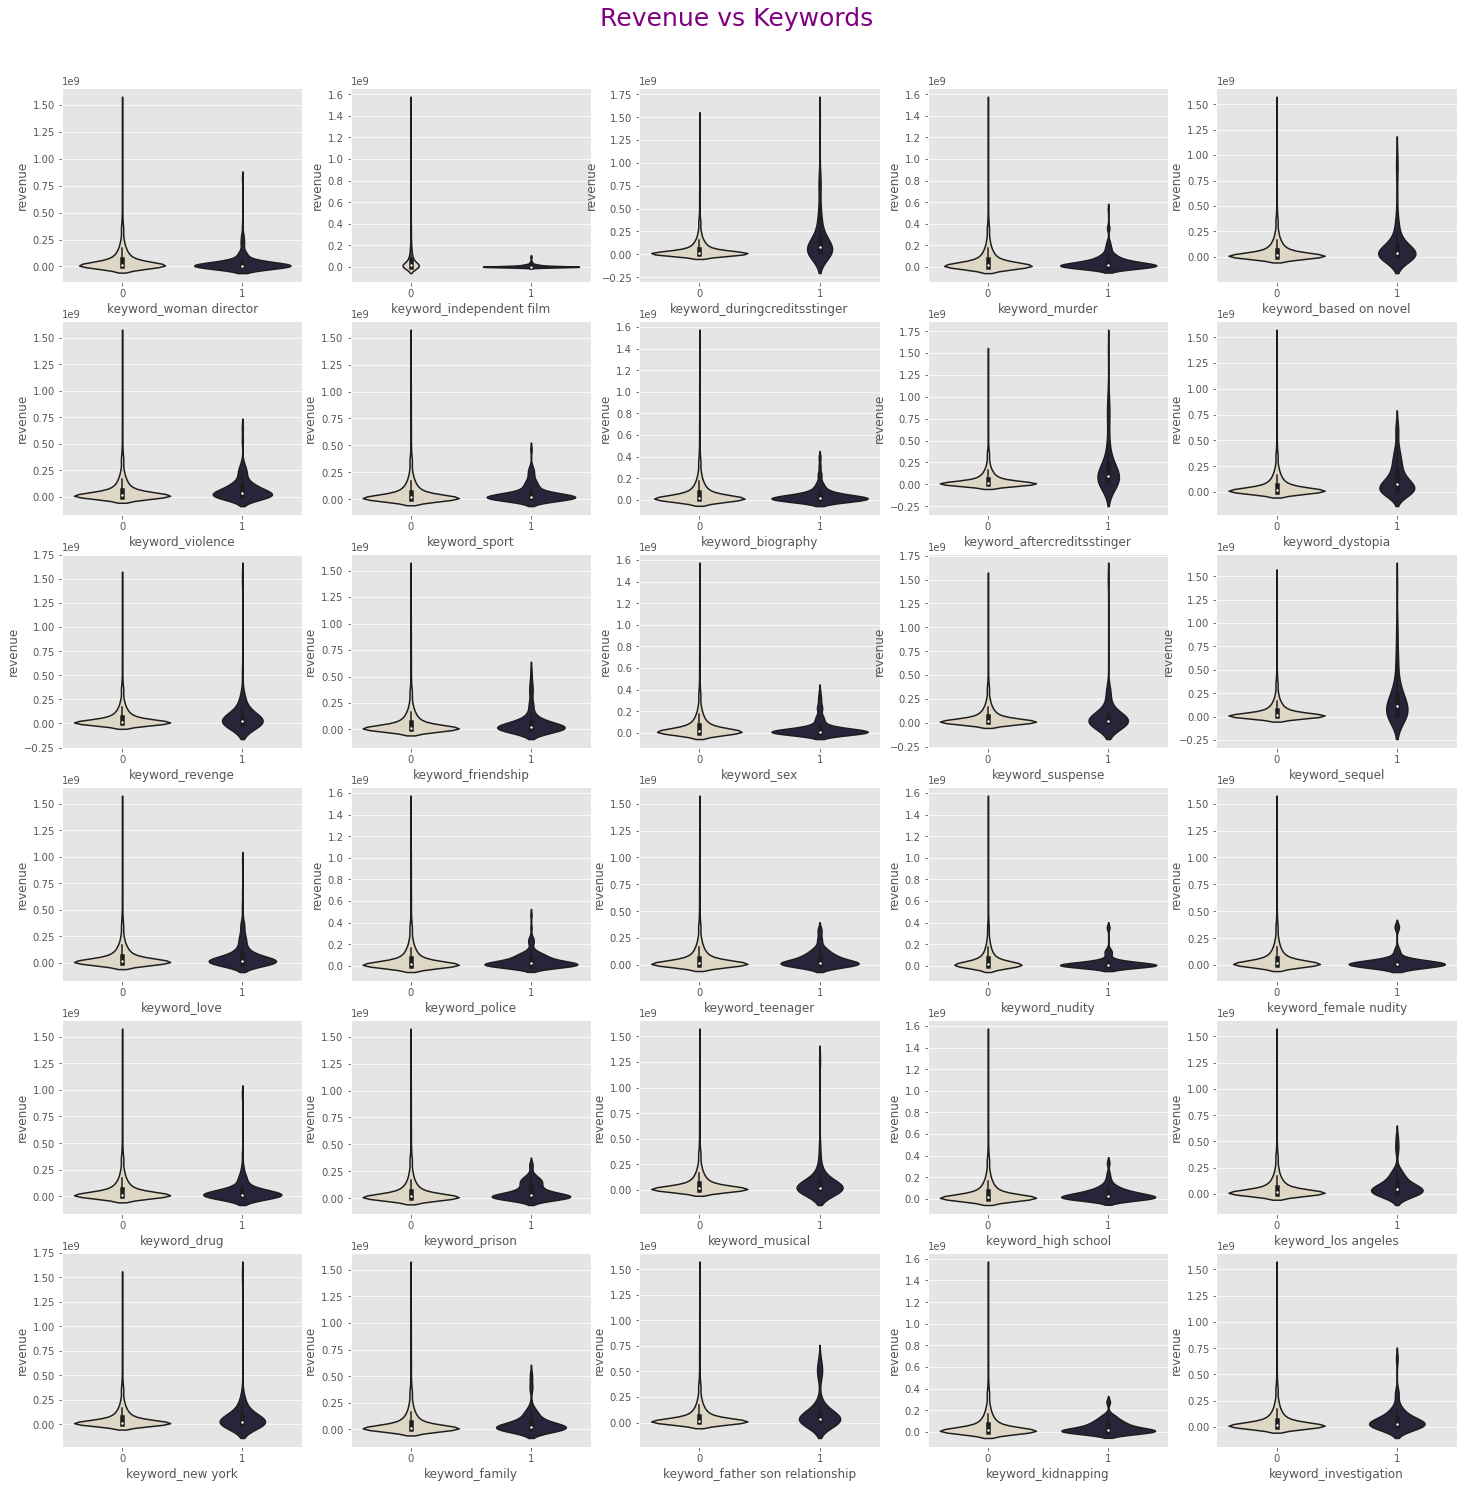

In [123]:
fig, ax = plt.subplots(6, 5, figsize=(25, 25))
plt.suptitle("Revenue vs Keywords", y=0.925, fontsize=25, color='purple')
for ind, val in enumerate([col for col in new_train.columns if 'keyword_' in col and col != 'keyword_numbers']):
    sns.violinplot(x=val, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='ch:s=-.2,r=.6')
plt.show()

<b>Crew</b>

In [124]:
[i for i in new_train.columns if 'crew_' in i],np.sum([1 for i in new_train.columns if 'crew_' in i]) 

(['crew_numbers',
  'crew_name_Avy Kaufman',
  'crew_name_Robert Rodriguez',
  'crew_name_Deborah Aquila',
  'crew_name_James Newton Howard',
  'crew_name_Mary Vernieu',
  'crew_name_Steven Spielberg',
  'crew_name_Luc Besson',
  'crew_name_Jerry Goldsmith',
  'crew_name_Francine Maisler',
  'crew_name_Tricia Wood',
  'crew_name_James Horner',
  'crew_name_Kerry Barden',
  'crew_name_Bob Weinstein',
  'crew_name_Harvey Weinstein',
  'crew_name_Janet Hirshenson'],
 16)

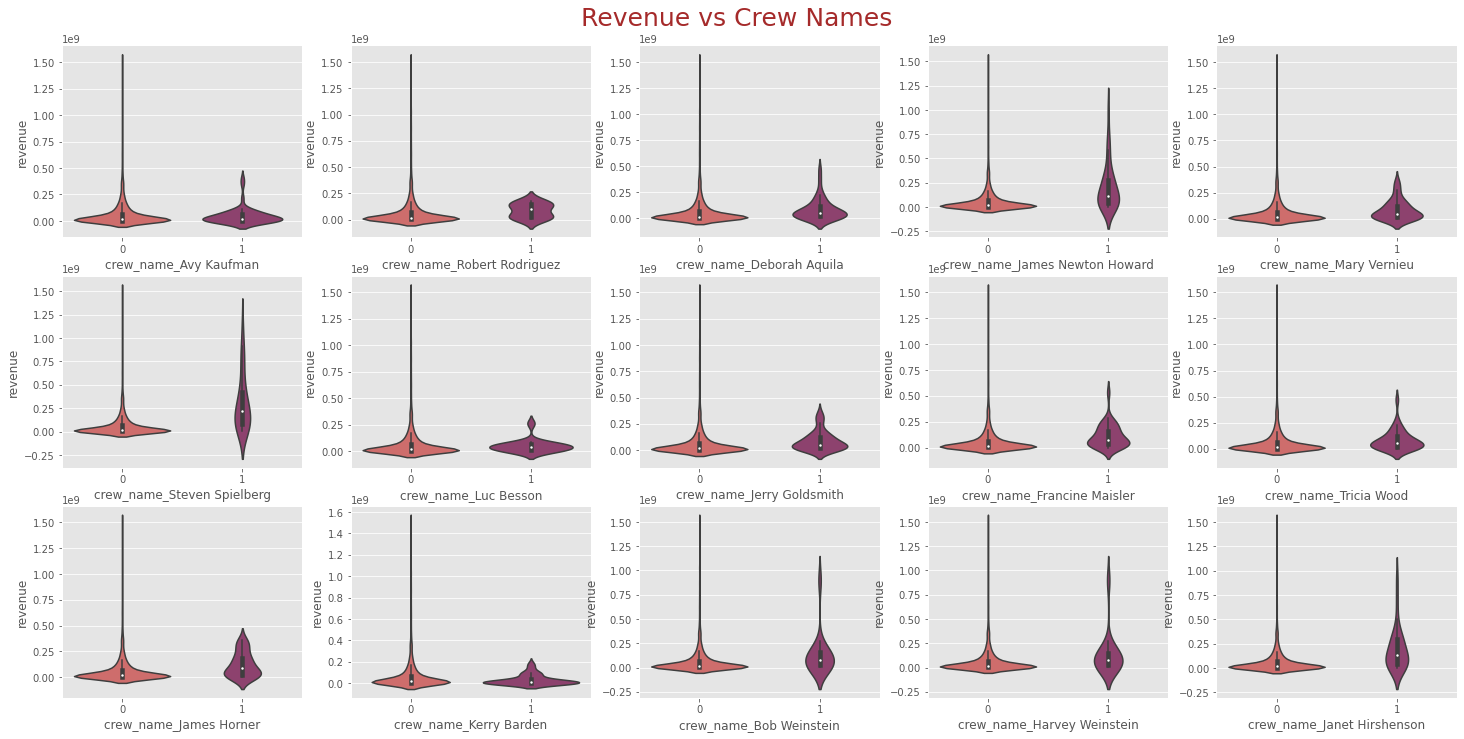

In [125]:
fig, ax = plt.subplots(3, 5, figsize=(25, 12))
plt.suptitle("Revenue vs Crew Names", y=0.925, fontsize=25, color='brown')
for ind, val in enumerate([col for col in new_train.columns if 'crew_' in col and col != 'crew_numbers']):
    sns.violinplot(x=val, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='flare')
plt.show()

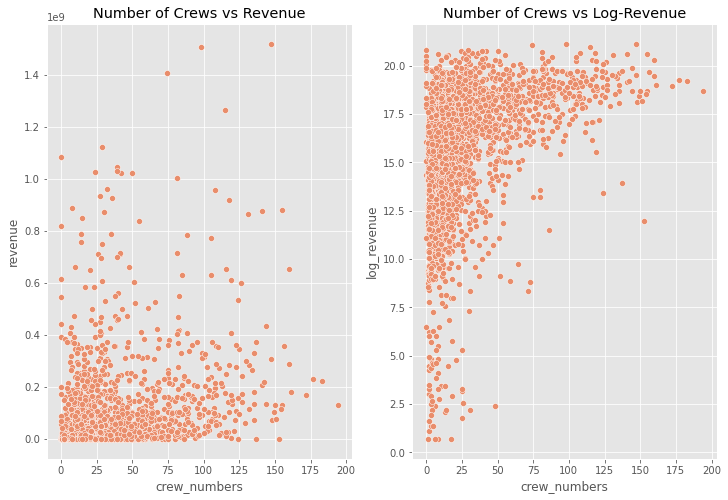

In [126]:
sns.set_palette('flare')
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=new_train.crew_numbers, y=new_train.revenue)
plt.title("Number of Crews vs Revenue")

plt.subplot(1, 2, 2)
sns.scatterplot(x=new_train.crew_numbers, y=new_train.log_revenue)
plt.title("Number of Crews vs Log-Revenue")

plt.show()

<b>Jobs</b>

In [127]:
[i for i in new_train.columns if 'jobs_' in i], np.sum([1 for i in new_train.columns if 'jobs_' in i])

(['jobs_Producer',
  'jobs_Executive Producer',
  'jobs_Director',
  'jobs_Screenplay',
  'jobs_Editor',
  'jobs_Casting',
  'jobs_Director of Photography',
  'jobs_Original Music Composer',
  'jobs_Art Direction',
  'jobs_Production Design',
  'jobs_Costume Design',
  'jobs_Writer',
  'jobs_Set Decoration',
  'jobs_Makeup Artist',
  'jobs_Sound Re-Recording Mixer'],
 15)

In [128]:
fig, ax = plt.subplots(3, 5, figsize=(25,12), dpi=500)
plt.suptitle("Violin Plot for Jobs vs Revenue", y=0.925, color='blue', fontsize=25)
for ind, val in enumerate([col for col in new_train.columns if 'jobs_' in col]):
    sns.violinplot(x=val, y='revenue', data=new_train, ax=ax[ind//5][ind%5], palette='Blues')
plt.show()

# Creating Models and Making Predictions
<a href='#Introduction'>Back to Top</a>

In [129]:
trainc = new_train.copy()
testc = new_test.copy()

trainc = trainc.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status', 'log_revenue'], axis=1)
testc = testc.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status'], axis=1)

In [130]:
for col in trainc.columns:
    if trainc[col].nunique() == 1:
        trainc = trainc.drop([col], axis=1)
        testc = testc.drop([col], axis=1)

In [131]:
trainc.original_language, trainc.collection_names, trainc.all_genres

(0       en
 1       en
 2       en
 3       hi
 4       ko
         ..
 2995    en
 2996    sv
 2997    en
 2998    en
 2999    en
 Name: original_language, Length: 3000, dtype: object,
 0       Hot Tub Time Machine Collection
 1       The Princess Diaries Collection
 2                                     0
 3                                     0
 4                                     0
                      ...               
 2995                                  0
 2996                                  0
 2997                                  0
 2998                                  0
 2999                                  0
 Name: collection_names, Length: 3000, dtype: object,
 0                              Comedy
 1         Comedy Drama Family Romance
 2                               Drama
 3                      Drama Thriller
 4                     Action Thriller
                     ...              
 2995                   Comedy Romance
 2996                      Drama Mu

In [132]:
for col in['original_language', 'collection_names', 'all_genres']:
    le = LabelEncoder()
    le.fit([*trainc[col].fillna('')] + [*testc[col].fillna('')])
    trainc[col] = le.transform(trainc[col].fillna('').astype(str))
    testc[col] = le.transform(testc[col].fillna('').astype(str))

In [133]:
train_txt = trainc[['title', 'tagline', 'overview', 'original_title']]
test_txt = testc[['title', 'tagline', 'overview', 'original_title']]

In [134]:
train_txt.head()

title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                            overview  \
0  When Lou, who has become the "father of the In...   
1  Mia Thermopolis is now a college graduate and ...   
2  Under the direction of a ruthless instructor, ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...   
4  Marine Boy is the story of a former national s...   

                             original_title  
0                    Hot Tub Time Machine 2  
1  The Princess Diaries 2: Royal Engagement  
2                                  Whiplash  
3                                   Kahaani  
4                                      마린보이

In [135]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    trainc['len_' + col] = trainc[col].fillna('').apply(lambda x: len(str(x)))
    trainc['words_' + col] = trainc[col].fillna('').apply(lambda x:len(str(x.split(' '))))
    trainc = trainc.drop([col], axis=1)
    testc['len_' + col] = testc[col].fillna('').apply(lambda x: len(str(x)))
    testc['words_ ' + col] = testc[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    testc = testc.drop([col], axis=1)

In below's codes came from this kernel: <a href='https://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme?scriptVersionId=13090392&cellId=20'>Click to go Kernel</a>

In [136]:
# This code came from: 
trainc.loc[trainc['id'] == 16,'revenue'] = 192864          # Skinning
trainc.loc[trainc['id'] == 90,'budget'] = 30000000         # Sommersby          
trainc.loc[trainc['id'] == 118,'budget'] = 60000000        # Wild Hogs
trainc.loc[trainc['id'] == 149,'budget'] = 18000000        # Beethoven
trainc.loc[trainc['id'] == 313,'revenue'] = 12000000       # The Cookout 
trainc.loc[trainc['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
trainc.loc[trainc['id'] == 464,'budget'] = 20000000        # Parenthood
trainc.loc[trainc['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
trainc.loc[trainc['id'] == 513,'budget'] = 930000          # From Prada to Nada
trainc.loc[trainc['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
trainc.loc[trainc['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
trainc.loc[trainc['id'] == 850,'budget'] = 90000000        # Modern Times
trainc.loc[trainc['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
trainc.loc[trainc['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
trainc.loc[trainc['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
trainc.loc[trainc['id'] == 1542,'budget'] = 1              # All at Once
trainc.loc[trainc['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
trainc.loc[trainc['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
trainc.loc[trainc['id'] == 1714,'budget'] = 46000000       # The Recruit
trainc.loc[trainc['id'] == 1721,'budget'] = 17500000       # Cocoon
trainc.loc[trainc['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
trainc.loc[trainc['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
trainc.loc[trainc['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
trainc.loc[trainc['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
trainc.loc[trainc['id'] == 2612,'budget'] = 15000000       # Field of Dreams
trainc.loc[trainc['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
trainc.loc[trainc['id'] == 2801,'budget'] = 10000000       # Fracture
testc.loc[testc['id'] == 3889,'budget'] = 15000000       # Colossal
testc.loc[testc['id'] == 6733,'budget'] = 5000000        # The Big Sick
testc.loc[testc['id'] == 3197,'budget'] = 8000000        # High-Rise
testc.loc[testc['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
testc.loc[testc['id'] == 5704,'budget'] = 4300000        # French Connection II
testc.loc[testc['id'] == 6109,'budget'] = 281756         # Dogtooth
testc.loc[testc['id'] == 7242,'budget'] = 10000000       # Addams Family Values
testc.loc[testc['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
testc.loc[testc['id'] == 5591,'budget'] = 4000000        # The Orphanage
testc.loc[testc['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = trainc.id[trainc.budget > 1000][trainc.revenue < 100]

for k in power_six :
    trainc.loc[trainc['id'] == k,'revenue'] =  trainc.loc[trainc['id'] == k,'revenue'] * 1000000

In [137]:
for col in trainc.columns:
    if trainc[col].dtype == 'O':
        print(col)

all_companies
all_countries
all_languages
all_keywords


In [138]:
X = trainc.drop(['id', 'revenue', 'all_companies', 'all_countries', 'all_languages', 'all_keywords'], axis=1)
y = np.log1p(trainc.revenue)
X_test = testc.drop(['id', 'all_companies', 'all_countries', 'all_languages', 'all_keywords'], axis=1)

In [139]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [140]:
model1 = lgb.LGBMRegressor(num_leaves= 30, min_data_in_leaf=20, objective='regression', max_depth=5,
                          learning_rate=0.01, boosting='gbdt', feature_fraction=0.9, bagging_freq=1,
                          bagging_fraction=0.9, bagging_seed=11, metric='rmse', lambda_l1=0.2, verbosity=-1,
                          n_estimators=20000, nthread=4, n_jobs=-1)
model1.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', verbose=1000,
          early_stopping_rounds=200)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1000]	training's rmse: 1.31967	valid_1's rmse: 1.81677


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_data_in_leaf=20, n_estimators=20000, nthread=4, num_leaves=30,
              objective='regression', verbosity=-1)

In [141]:
eli.show_weights(model1, feature_filter=lambda x: x!='<BIAS>')

In [142]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [143]:
def model_train(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):
    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    
    for fold_n, (train_index, validation_index) in enumerate(folds.split(X)):
        print(f"Folds {fold_n} started at {time.ctime()}")
        
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[validation_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[validation_index]
        y_train, y_valid = y[train_index], y[validation_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimator=20000, nthread=4, n_jobs=-1)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                     verbose=1000, early_stopping_rounds=200)
        
            y_predict_valid = model.predict(X_valid)
            y_predict = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)
            
            watch_list = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watch_list, early_stopping_rounds=200,
                             verbose_eval=500, params=params)
            y_predict_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_predict = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)
            
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_predict_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_predict_valid)
            
            y_predict = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000, eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)
            
            y_predict_valid = model.predict(X_valid)
            y_predict = model.predict(X_test)
            
        oof[validation_index] = y_predict_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_predict_valid) ** 0.5)
        
        prediction += y_predict
    
        if model_type == 'lgb':
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
        
    prediction /= n_fold
    
    print("CV mean score: {0:.4f}, std: {1:.4f}.".format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby('feature').mean().sort_values(by='importance',
                                                                                                      ascending=False)[:50].index
            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]
            
            plt.figure(figsize=(16,12))
            sns.barplot(x='importance', y='feature', data=best_features.sort_values('importance', ascending=False));
            plt.title("LGB Features (avg over folds)");
            
            return oof, prediction, feature_importance
        
        return oof, prediction
    
    else:
        return oof, prediction

Folds 0 started at Thu Feb  3 11:25:16 2022
Folds 1 started at Thu Feb  3 11:25:17 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Folds 2 started at Thu Feb  3 11:25:17 2022
[LightGBM] [Warning] 

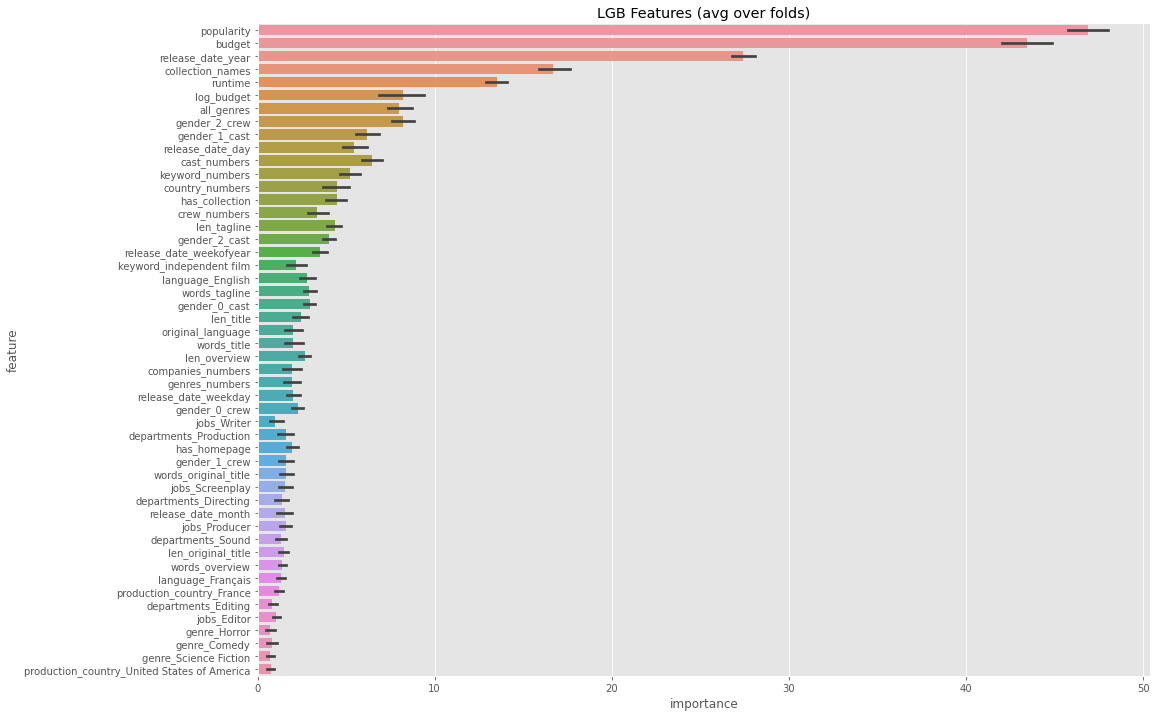

In [144]:
params = dict(num_leaves=30, min_data_in_leaf=10, objective='regression', max_depth=5, learning_rate=0.01,
             boosting='gbdt', feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11,
             metric='rmse', lambda_l1=0.2, verbosity=-1)

oof_lgb, prediction_lgb, _ = model_train(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

## Text Based OOF Features
<a href='#Introduction'>Back to Top</a>

In [145]:
for col in train_txt:
    vectorizer = TfidfVectorizer(sublinear_tf=True, analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2),
                                min_df=10)
    vectorizer.fit([*train_txt[col].fillna('')] + [*test_txt[col].fillna('')])
    train_col_txt = vectorizer.transform(train_txt[col].fillna(''))
    test_col_txt = vectorizer.transform(test_txt[col].fillna(''))
    model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error',
                                cv=folds)
    oof_txt, prediction_txt = model_train(train_col_txt, test_col_txt, y, params=None, model_type='sklearn', model=model)
    
    X[col + '_oof'] = oof_txt
    X_test[col + '_oof'] = prediction_txt

Folds 0 started at Thu Feb  3 11:25:21 2022
Folds 1 started at Thu Feb  3 11:25:21 2022
Folds 2 started at Thu Feb  3 11:25:21 2022
Folds 3 started at Thu Feb  3 11:25:22 2022
Folds 4 started at Thu Feb  3 11:25:22 2022
Folds 5 started at Thu Feb  3 11:25:22 2022
Folds 6 started at Thu Feb  3 11:25:22 2022
Folds 7 started at Thu Feb  3 11:25:23 2022
Folds 8 started at Thu Feb  3 11:25:23 2022
Folds 9 started at Thu Feb  3 11:25:23 2022
CV mean score: 2.9692, std: 0.2116.
Folds 0 started at Thu Feb  3 11:25:24 2022
Folds 1 started at Thu Feb  3 11:25:24 2022
Folds 2 started at Thu Feb  3 11:25:24 2022
Folds 3 started at Thu Feb  3 11:25:25 2022
Folds 4 started at Thu Feb  3 11:25:25 2022
Folds 5 started at Thu Feb  3 11:25:26 2022
Folds 6 started at Thu Feb  3 11:25:26 2022
Folds 7 started at Thu Feb  3 11:25:26 2022
Folds 8 started at Thu Feb  3 11:25:27 2022
Folds 9 started at Thu Feb  3 11:25:27 2022
CV mean score: 2.8814, std: 0.1759.
Folds 0 started at Thu Feb  3 11:25:29 2022
Fold

## Generating More Features
<a href='#Introduction'>Back to Top</a>

In [146]:
# Looking at X df
X.head()

budget  original_language  popularity  runtime  collection_names  \
0  14000000                 10    6.575393     93.0               282   
1  40000000                 10    8.248895    113.0               641   
2   3300000                 10   64.299990    105.0                 1   
3   1200000                 16    3.174936    122.0                 1   
4         0                 24    1.148070    118.0                 1   

   has_collection  genres_numbers  all_genres  genre_Drama  genre_Comedy  \
0               1               1         480            0             1   
1               1               4         516            1             1   
2               0               1         658            1             0   
3               0               2         742            1             0   
4               0               2         295            0             0   

   genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  \
0               0             0              0            0                0   
1               0             0              1            0                0   
2               0             0              0            0                0   
3               1             0              0            0                0   
4               1             1              0            0                0   

   genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  \
0             0                      0             0              0   
1             0                      0             1              0   
2             0                      0             0              0   
3             0                      0             0              0   
4             0                      0             0              0   

   genre_Mystery  genre_Animation  genre_History  genre_Music  \
0              0                0              0            0   
1              0                0              0            0   
2              0                0              0            0   
3              0                0              0            0   
4              0                0              0            0   

   companies_numbers  production_company_Warner Bros.  \
0                  3                                0   
1                  1                                0   
2                  3                                0   
3                  0                                0   
4                  0                                0   

   production_company_Universal Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Paramount Pictures  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                     

In [147]:
def new_properties(df):
    df['budget_over_popularity'] = df['budget'] / df['popularity']
    df['budget_over_runtime'] = df['budget'] / df['runtime']
    df['_budget_year_ratio'] = df['budget'] / (df['release_date_year'] * df['release_date_year'])
    df['_releaseYear_popularity_ratio'] = df['release_date_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_date_year']
    
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby("release_date_year")["runtime"].transform('mean')
    df['popularity_to_mean_year'] = df['popularity'] / df.groupby("release_date_year")["popularity"].transform('mean')
    df['budget_to_mean_year'] = df['budget'] / df.groupby("release_date_year")["budget"].transform('mean')
        
    return df

In [148]:
X = new_properties(X)
X_test = new_properties(X_test)

Folds 0 started at Thu Feb  3 11:25:40 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Folds 1 started at Thu Feb  3 11:25:40 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [W

CV mean score: 2.2048, std: 0.2008.


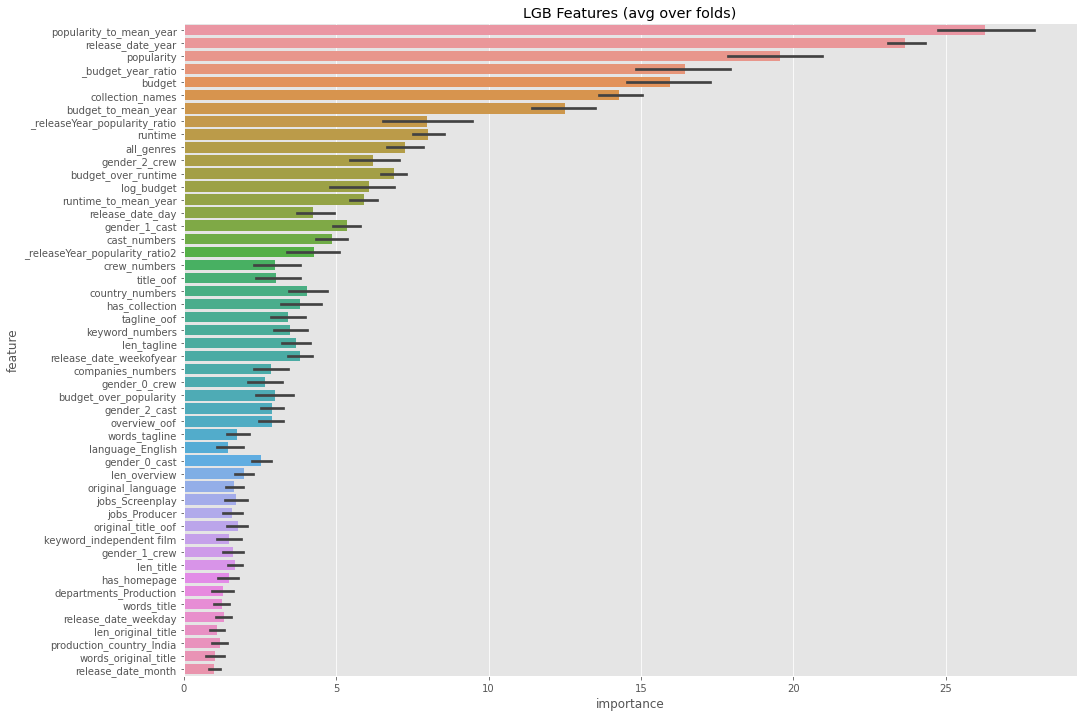

In [149]:
oof_lgb, prediction_lgb, _ = model_train(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

## Critical Features
<a href='#Introduction'>Back to Top</a>

In [150]:
X_train, X_valid, y_train, t_valid = train_test_split(X, y, test_size=0.1)

params = dict(num_leaves=30, min_data_in_leaf=20, objective='regression', max_depth=6, learning_rate=0.01,
             boosting='gbdt', feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11,
             metric='rmse', lambda_l1=0.2, verbosity=-1)

model1 = lgb.LGBMRegressor(**params, n_estimators=20000, nthread=4, n_jobs=-1)
model1.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', verbose=1000,
          early_stopping_rounds=2000)
eli.show_weights(model1, feature_filter=lambda x: x!='<BIAS>')

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1000]	training's rmse: 1.08981	valid_1's rmse: 3.66009
[2000]	training's rmse: 0.73047	valid_1's rmse: 3.69385


We can observe that crucial native LGB features and top ELI5 features are usually the same. This indicates that our model is capable of handling these features.

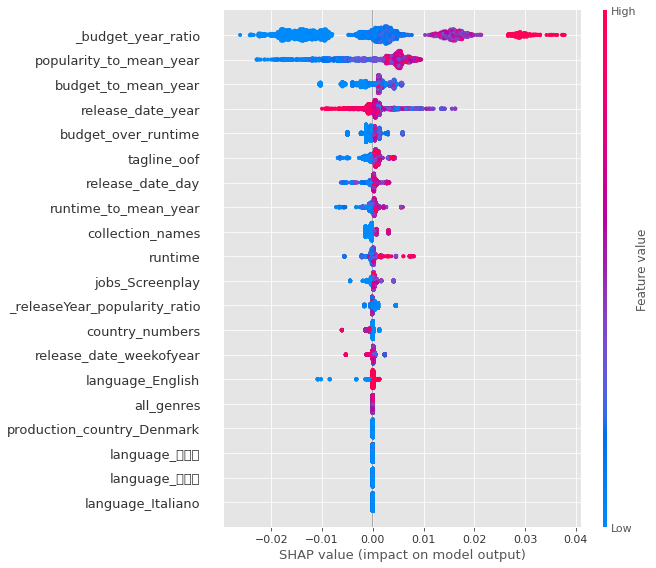

In [151]:
explainer = shap.TreeExplainer(model1, X_train)
values_shap = explainer.shap_values(X_train)
shap.summary_plot(values_shap, X_train)

SHAP gives more in-depth data, yet it may be more difficult to comprehend. For example, a low budget has a negative influence on revenue, but a high budget has a positive impact on revenue.

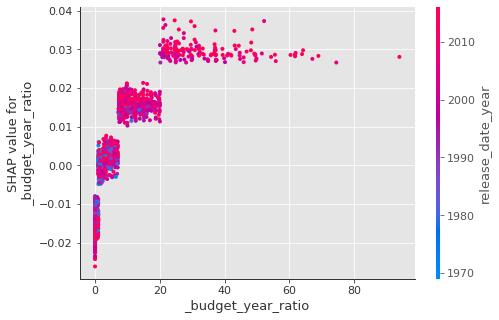

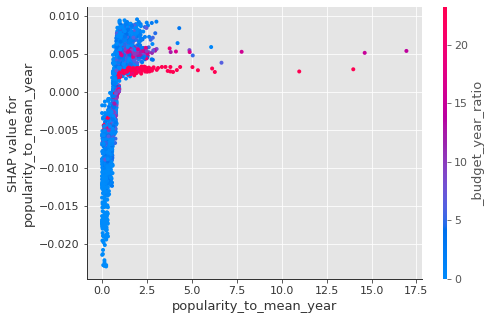

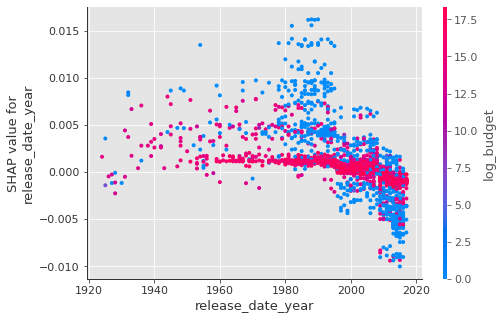

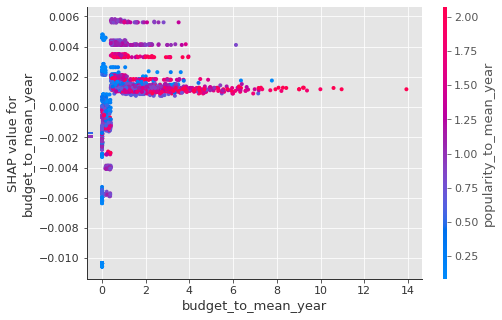

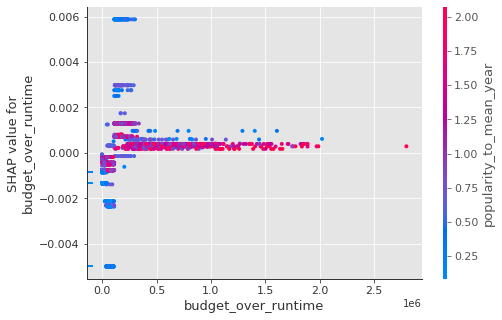

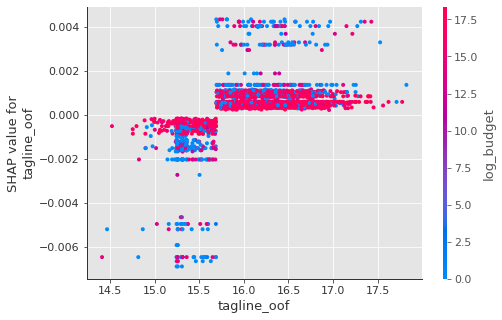

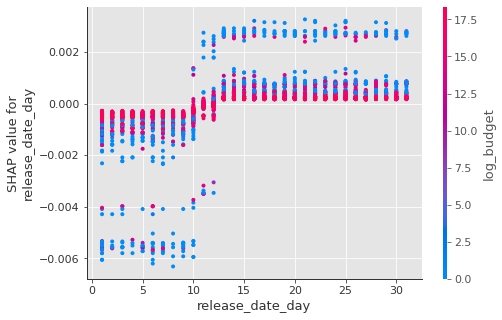

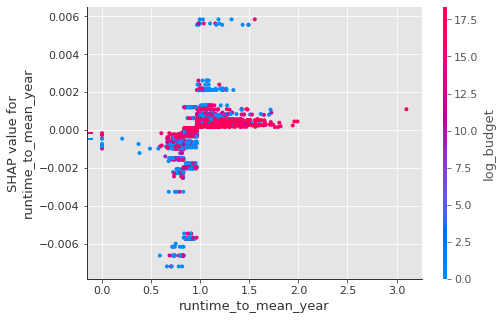

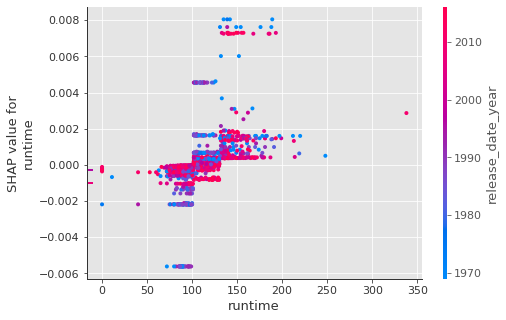

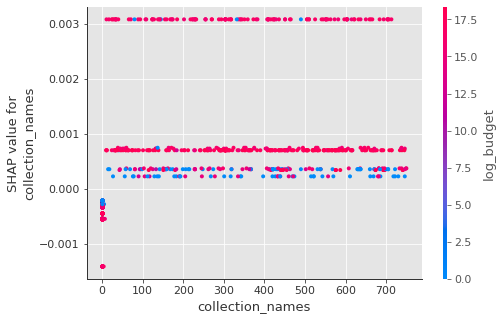

In [152]:
top_cols = X_train.columns[np.argsort(values_shap.std(0))[::-1]][:10]
for col in top_cols:
    shap.dependence_plot(col, values_shap, X_train)

Interactions between significant characteristics may be shown here. There's a lot of intriguing stuff here. Relationship between release date year and log budget, for example. Up until 1990, low-budget films brought in more money, but after that, high-budget films tended to bring in more money. In general, the budget's impact was reduced. Let's create new features that interact with the most crucial ones. Some of them are illogical, but they may help to enhance the model.

In [153]:
def top_cols_interactions(df):
    df['budget_to_year'] = df['budget'] / df['release_date_year']
    df['budget_to_mean_year2year'] = df['budget_to_mean_year'] / df['release_date_year']
    df['popularity_to_mean_year_to_log_budget'] = df['popularity_to_mean_year'] / df['log_budget']
    df['year_to_log_budget'] = df['release_date_year'] / df['log_budget']
    df['budget_to_runtime_to_year'] = df['budget_over_runtime'] / df['release_date_year']
    df['genders_1_cast_to_log_budget'] = df['gender_1_cast'] / df['log_budget']
    df['all_genres_to_popularity_to_mean_year'] = df['all_genres'] / df['popularity_to_mean_year']
    df['genders_2_crew_to_budget_to_mean_year'] = df['gender_2_crew'] / df['budget_to_mean_year']
    df['overview_oof_to_genders_2_crew'] = df['overview_oof'] / df['gender_2_crew']
    
    return df

In [154]:
X = top_cols_interactions(X)
X_test = top_cols_interactions(X_test)

In [155]:
X = X.replace([np.inf, -np.inf], 0).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], 0).fillna(0)

## External Features
<a href='#Introduction'>Back to Top</a>

In [156]:
additional_train = pd.read_csv('TrainAdditionalFeatures.csv')
additional_test = pd.read_csv('TestAdditionalFeatures.csv')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X['imdb_id'] = train['imdb_id']
X_test['imdb_id'] = test['imdb_id']

del train, test

X = pd.merge(X, additional_train, how='left', on=['imdb_id'])
X_test = pd.merge(X_test, additional_test, how='left', on=['imdb_id'])

X = X.drop(['imdb_id'], axis=1)
X_test = X_test.drop(['imdb_id'], axis=1)

In [157]:
# Looking at latest changes for our data
X.head()

budget  original_language  popularity  runtime  collection_names  \
0  14000000                 10    6.575393     93.0               282   
1  40000000                 10    8.248895    113.0               641   
2   3300000                 10   64.299990    105.0                 1   
3   1200000                 16    3.174936    122.0                 1   
4         0                 24    1.148070    118.0                 1   

   has_collection  genres_numbers  all_genres  genre_Drama  genre_Comedy  \
0               1               1         480            0             1   
1               1               4         516            1             1   
2               0               1         658            1             0   
3               0               2         742            1             0   
4               0               2         295            0             0   

   genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  \
0               0             0              0            0                0   
1               0             0              1            0                0   
2               0             0              0            0                0   
3               1             0              0            0                0   
4               1             1              0            0                0   

   genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  \
0             0                      0             0              0   
1             0                      0             1              0   
2             0                      0             0              0   
3             0                      0             0              0   
4             0                      0             0              0   

   genre_Mystery  genre_Animation  genre_History  genre_Music  \
0              0                0              0            0   
1              0                0              0            0   
2              0                0              0            0   
3              0                0              0            0   
4              0                0              0            0   

   companies_numbers  production_company_Warner Bros.  \
0                  3                                0   
1                  1                                0   
2                  3                                0   
3                  0                                0   
4                  0                                0   

   production_company_Universal Pictures  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Paramount Pictures  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                     

## Model Blending
<a href='#Introduction'>Back to Top</a>

Folds 0 started at Thu Feb  3 11:26:05 2022
Folds 1 started at Thu Feb  3 11:26:06 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Folds 2 started at Thu Feb  3 11:26:06 2022
[LightGBM] [Warning] 

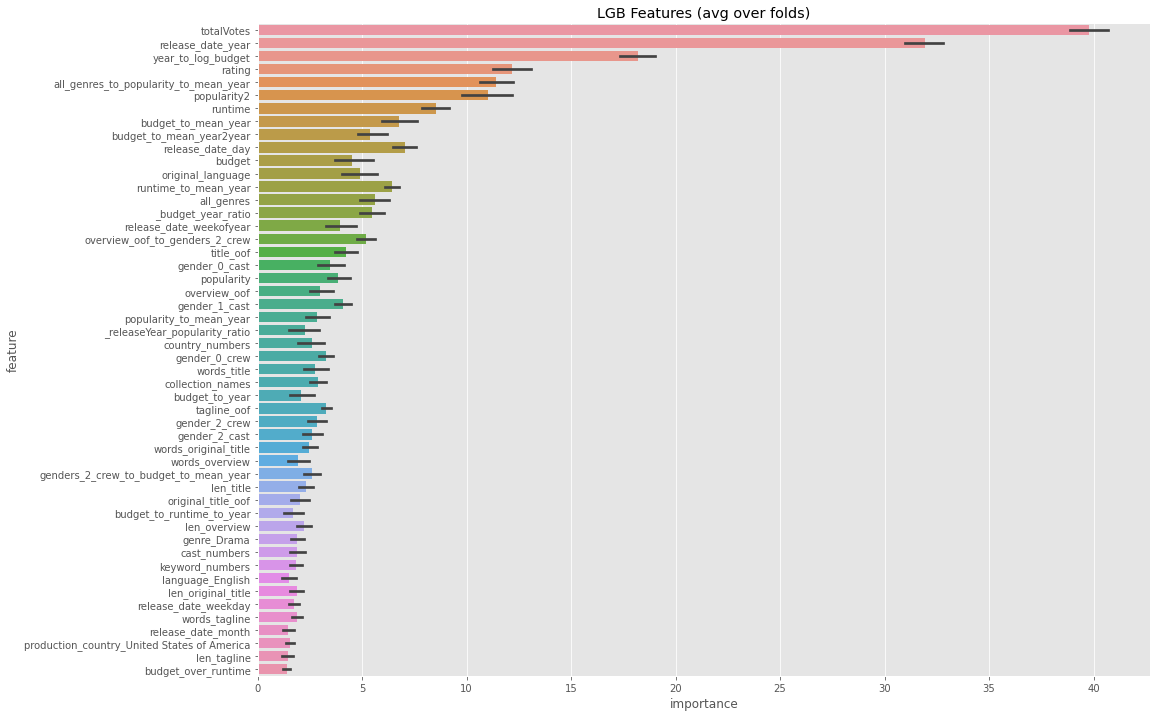

In [158]:
params = dict(num_leaves=30, min_data_in_leaf=20, objective='regression', max_depth=9, learning_rate=0.01,
             boosting='gbdt', feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11,
             metric='rmse', lambda_l1=0.2, verbosity=-1)
oof_lgb, prediction_lgb, _ = model_train(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [159]:
xgb_params = dict(eta = 0.01, objective='reg:linear', max_depth=7, subsample=0.8, colsample_bytree=0.8, eval_metric='rmse',
                 seed=11, silent=True)
oof_xgb, prediction_xgb = model_train(X, X_test, y, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Folds 0 started at Thu Feb  3 11:26:11 2022
[11:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:15.59629	valid_data-rmse:15.89942
[500]	train-rmse:0.87321	valid_data-rmse:1.74397
[1000]	train-rmse:0.51753	valid_data-rmse:1.72516
[1369]	train-rmse:0.36560	valid_data-rmse:1.72341
Folds 1 started at Thu Feb  3 11:26:32 2022
[11:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:

[500]	train-rmse:0.85874	valid_data-rmse:1.84012
[1000]	train-rmse:0.51008	valid_data-rmse:1.81768
[1126]	train-rmse:0.45519	valid_data-rmse:1.81743
CV mean score: 1.8160, std: 0.1651.


In [160]:
cat_params = dict(learning_rate=0.002, depth=5, l2_leaf_reg=10, colsample_bylevel=0.8, bagging_temperature=0.2,
                 od_type='Iter', od_wait=100, random_seed=11, allow_writing_files=False)

oof_cat, prediction_cat = model_train(X, X_test, y, params=cat_params, model_type='cat')

Folds 0 started at Thu Feb  3 11:29:28 2022
Folds 1 started at Thu Feb  3 11:30:27 2022
Folds 2 started at Thu Feb  3 11:31:11 2022
Folds 3 started at Thu Feb  3 11:33:00 2022
Folds 4 started at Thu Feb  3 11:34:32 2022
Folds 5 started at Thu Feb  3 11:35:32 2022
Folds 6 started at Thu Feb  3 11:36:29 2022
Folds 7 started at Thu Feb  3 11:37:19 2022
Folds 8 started at Thu Feb  3 11:38:40 2022
Folds 9 started at Thu Feb  3 11:39:32 2022
CV mean score: 1.8191, std: 0.1797.


In [161]:
params = dict(num_leaves=30, min_data_in_leaf=20, objective='regression', max_depth=5, learning_rate=0.01,
             boosting='gbdt', feature_fraction=0.9, bagging_freq=1, bagging_fraction=0.9, bagging_seed=11,
             metric='rmse', lambda_l1=0.2, verbosity=-1)
oof_lgb2, prediction_lgb_2 = model_train(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Folds 0 started at Thu Feb  3 11:39:57 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Folds 1 started at Thu Feb  3 11:39:58 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [W

CV mean score: 2.1362, std: 0.1952.


In [162]:
params = dict(num_leaves=30, min_data_in_leaf=20, objective='regression', max_depth=7, learning_rate=0.02,
             boosting='gbdt', feature_fraction=0.7, bagging_freq=1, bagging_fraction=0.7, bagging_seed=11,
             metric='rmse', lambda_l1=0.2, verbosity=-1)
oof_lgb3, prediction_lgb_3 = model_train(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Folds 0 started at Thu Feb  3 11:40:02 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Folds 1 started at Thu Feb  3 11:40:02 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [W

CV mean score: 1.9503, std: 0.1825.


## Stacking
<a href='#Introduction'>Back to Top</a>

In [163]:
stack_train = np.vstack([oof_lgb, oof_xgb, oof_cat, oof_lgb2, oof_lgb3]).transpose()
stack_train = pd.DataFrame(stack_train, columns=['lgb', 'xgb', 'cat', 'lgb2', 'lgb3'])
stack_test = np.vstack([prediction_lgb, prediction_xgb, prediction_cat, prediction_lgb_2, prediction_lgb_3]).transpose()
stack_test = pd.DataFrame(stack_test, columns=['lgb', 'xgb', 'cat', 'lgb2', 'lgb3'])

Folds 0 started at Thu Feb  3 11:40:07 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
Folds 1 started at Thu Feb  3 11:40:07 2022
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning

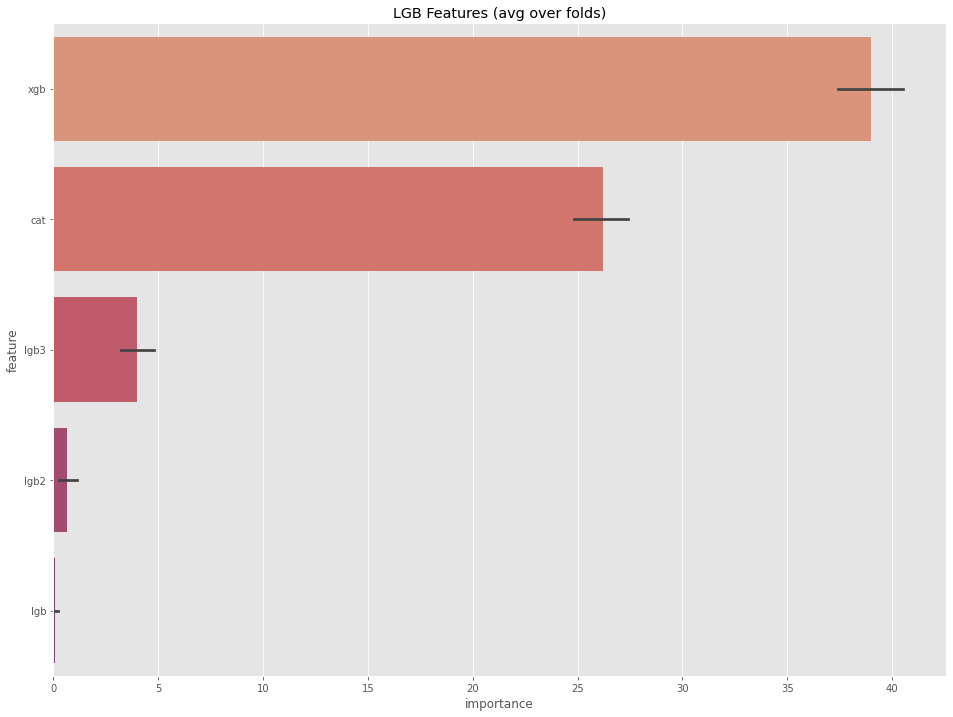

In [164]:
params = dict(num_leaves=8, min_data_in_leaf=20, objective='regression', max_depth=3, learning_rate=0.01, boosting='gbdt',
             bagging_seed=11, metric='rmse', lambda_l1=0.2, verbosity=-1)

oof_lgb_stack, prediction_lgb_stack, _ = model_train(stack_train, stack_test, y, params=params, model_type='lgb',
                                                    plot_feature_importance=True)

In [165]:
model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0, ), scoring='neg_mean_squared_error', cv=folds)
oof_rcv_stack, prdeiction_rcv_stack = model_train(stack_train.values, stack_test.values, y, params=None, model_type='sklearn',
                                                 model=model)

Folds 0 started at Thu Feb  3 11:40:08 2022
Folds 1 started at Thu Feb  3 11:40:08 2022
Folds 2 started at Thu Feb  3 11:40:08 2022
Folds 3 started at Thu Feb  3 11:40:08 2022
Folds 4 started at Thu Feb  3 11:40:09 2022
Folds 5 started at Thu Feb  3 11:40:09 2022
Folds 6 started at Thu Feb  3 11:40:09 2022
Folds 7 started at Thu Feb  3 11:40:09 2022
Folds 8 started at Thu Feb  3 11:40:09 2022
Folds 9 started at Thu Feb  3 11:40:09 2022
CV mean score: 1.8002, std: 0.1743.


# Comparing Prediction Models
<a href='#Introduction'>Back to Top</a>

<h3>CV Mean Scores of each Prediction Models:</h3><br>
<ol>
    <li>LGB Model with 9 max depth: CV mean score: 2.1255, std: 0.1948.</li>
    <li>LGB Model with 5 max depth: CV mean score: 2.1362, std: 0.1952.</li>
    <li>LGB Model with 7 max depth: CV mean score: 1.9503, std: 0.1825.</li>
    <li>XGB Model: CV mean score: 1.8160, std: 0.1651.</li>
    <li>CAT Model: CV mean score: 1.8191, std: 0.1797.</li>
</ol><br>
<strong>For this dataset, the fastest model in terms of processing speed is the 'LGB' model. On the other hand, the best model in terms of prediction consistency and performance is the 'XGB' model because the standard deviation rate is less than other cross validation models, meaning that the LGB model will have made a more consistent prediction on this data set. Additionally, stacking all of the models and using them on the data is also an option. Therefore, in addition to the model types, we also used the stacked models on the data set we have. As a result of this operation 'xgb' model type was more effective to our data set. The results are as follows:</strong>


<ol>
    <li>Stacked with LGB Model: CV mean score: 2.0289, std: 0.1870</li>
    <li>RichCV with SKLEARN Model: CV mean score: 1.8002, std: 0.1743</li>
</ol>

# Getting CSV Files of Prediction Models
<a href='#Introduction'>Back to Top</a>

In [166]:
sub = pd.read_csv('sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb)
sub.to_csv('lgb.csv', index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sub.to_csv('mixed.csv', index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat) / 3)
sub.to_csv('mixed2.csv', index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_2) / 4)
sub.to_csv('mixed3.csv', index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_2 + prediction_lgb_3) / 5)
sub.to_csv('mixed4.csv', index=False)

sub['revenue'] = prediction_lgb_stack
sub.to_csv('lgb_stack.csv', index=False)
sub['revenue'] = prdeiction_rcv_stack
sub.to_csv('rcv_stack.csv', index=False)

# Conclusion
<a href='#Introduction'>Back to top</a>

To sum up, in this project, we examined the features one by one in the TMDB movie data and observed the relationship between them. Using our detailed ideas about data, respectively; We have prepared a program that makes predictions about revenue values of each movie with the 'LGB', 'XGB' and 'CAT' models. Also, we stacked all of the models by mixing cumulatively, we used and found a prediction value. At the end of these operations, we saved each of the predictions for movies' revenue values as a separate csv file.